# 0.최소 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import time
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. MNIST 데이터 불러오기 

In [2]:
df=pd.read_csv('/content/sample_data/mnist_train_small.csv')

df.columns=['target']+list(range(1,785)) 

n=3 

df_tt=df[df['target']==n]

df_to=df[df['target']!=n]
df_to=df_to.sample(4000-len(df_tt))

df=pd.concat([df_tt,df_to],axis=0).reset_index(drop=True)
df['target']=df['target'].apply(lambda x : 1 if x==n else -1)

df = df.sample(frac=1).reset_index(drop=True) 
df

df_target=df.iloc[:,0:1]
df_train=df.iloc[:,1:]

x_test=df_train.to_numpy()
x_test=x_test/255               
y_test=df_target.to_numpy()
y_test=y_test.reshape(len(x_test),) 



df=pd.read_csv('/content/sample_data/mnist_test.csv')

df.columns=['target']+list(range(1,785)) 


n=3

df_tt=df[df['target']==n]

df_to=df[df['target']!=n]
df_to=df_to.sample(3200-len(df_tt))

df=pd.concat([df_tt,df_to],axis=0).reset_index(drop=True)
df['target']=df['target'].apply(lambda x : 1 if x==n else -1)

df = df.sample(frac=1).reset_index(drop=True) 
df

df_target=df.iloc[:,0:1]
df_train=df.iloc[:,1:]

x_train=df_train.to_numpy()
x_train=x_train/255 
y_train=df_target.to_numpy()
y_train=y_train.reshape(len(x_train),) 

a_i : preditor


b_i : response in {-1,1}


training 3000개 그외의 테스트 셋을 사용해도 괜찮음




# 2. 데이터 확인

In [ ]:
print(np.array(x_train[1:2,:]).T.shape)


array=np.array(x_train[1:2,:]).T.reshape(28,28).astype('uint8')

print(type(array))
image = Image.fromarray(array)
image

(784, 1)
<class 'numpy.ndarray'>


# 3. 모델학습


1. GD

   1-1 fixed learning_rate
   1-2 backtracking search

2. SGD




3. MSGD

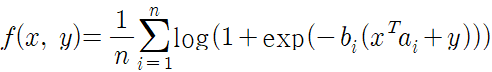






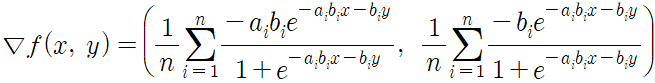



In [3]:
def function(x,y,weight,bias):
  
  
  cost=np.log(1+np.exp((-y)*(np.dot(x,weight)+bias))) 

  return cost.mean()

def prime_function(x,y,weight,bias):

  prime_x = (np.dot((-y),x) * np.exp((-y)*(np.dot(x,weight)+bias))) / ((1+np.exp((-y)*(np.dot(x,weight)+bias))))

  prime_y = ((-y)* np.exp((-y)*(np.dot(x,weight)+bias))) / ((1+np.exp((-y)*(np.dot(x,weight)+bias))))

  return prime_x, prime_y

In [4]:


def sigmoid(x): 
  return 1/(1+np.exp(-x))

def accuracy(y_pred,y_train):
  return np.sum(y_pred==y_train)/len(y_train)


def prediction(x,weight,bias,threshold=0.5):
  predictions = []
  for data in x:
    pred = sigmoid(np.dot(data,weight)+bias)
    
    if pred>=threshold:
      predictions.append(1)
    else:
      predictions.append(-1)

  return predictions



def GD1(x,y,weight,bias,lr=0.01):
  for data,label in zip(x,y):
    
    grad_weight, grad_bias = prime_function(data,label,weight,bias)
    weight= weight - lr*grad_weight 
    bias = bias - lr*grad_bias

  return weight, bias

def GD2(x,y,weight,bias,lr=0.01):

  tmp_grad_weight, tmp_grad_bias=0,0

  for data,label in zip(x,y):
    
    grad_weight, grad_bias = prime_function(data,label,weight,bias)
    tmp_grad_weight += grad_weight
    tmp_grad_bias += grad_bias

  x_length=len(x)

  weight -= lr* (tmp_grad_weight / x_length)
  bias -= lr* (tmp_grad_bias / x_length)

  return weight, bias




def SGD(x,y,lr,weight,bias):
  n=np.random.randint(0,len(x)) 
  data=x[n]
  label=y[n]
  grad_weight, grad_bias = prime_function(data,label,weight,bias)
  weight= weight - lr*grad_weight  
  bias = bias - lr*grad_bias
  print('random: ',n)

  return weight, bias


def MSGD(x,y,lr,weight,bias,batch_size=32):

  n=np.random.randint(0,len(x),size=batch_size) 
  
  print('random: ',n)


  tmp_grad_weight, tmp_grad_bias=0,0

  for data,label in zip(x[n],y[n]):
    
    grad_weight, grad_bias = prime_function(data,label,weight,bias)
    tmp_grad_weight += grad_weight
    tmp_grad_bias += grad_bias

  x_length=len(x)

  weight -= lr* (tmp_grad_weight / x_length)
  bias -= lr* (tmp_grad_bias / x_length)


  return weight, bias






##fixed-step-size (GD1)

##fixed-step-size (GD2)

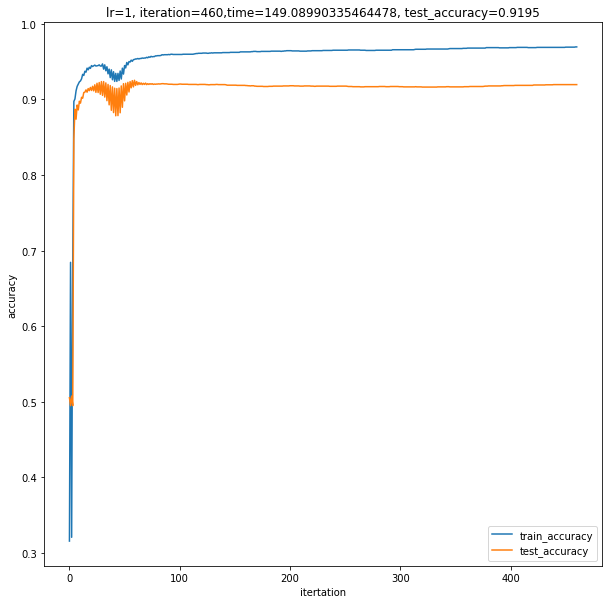

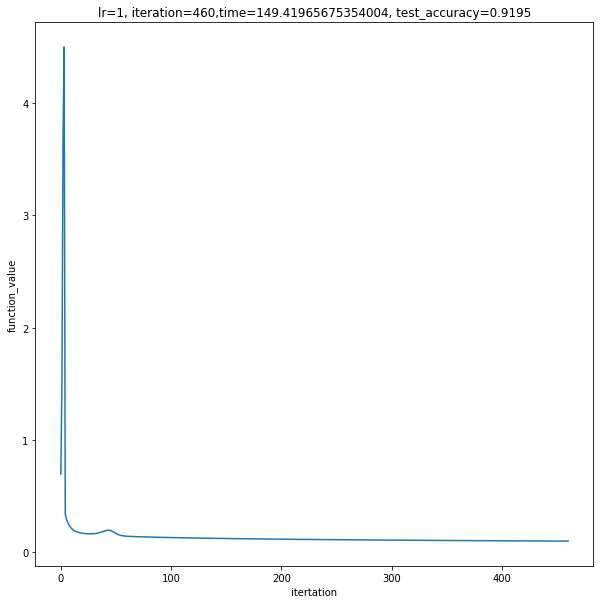

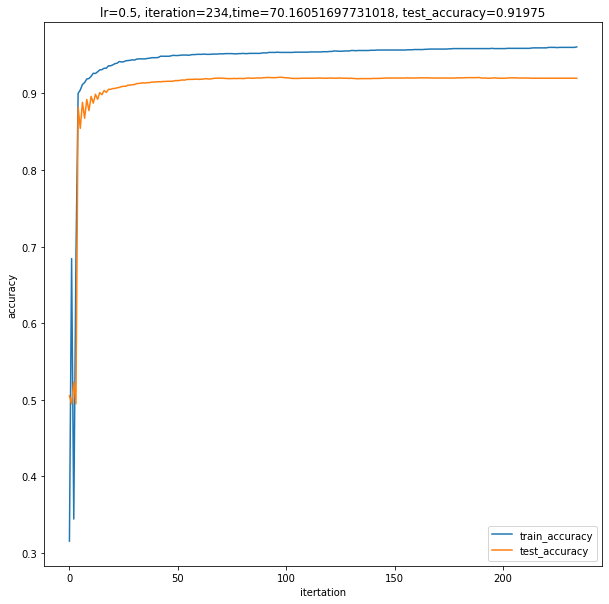

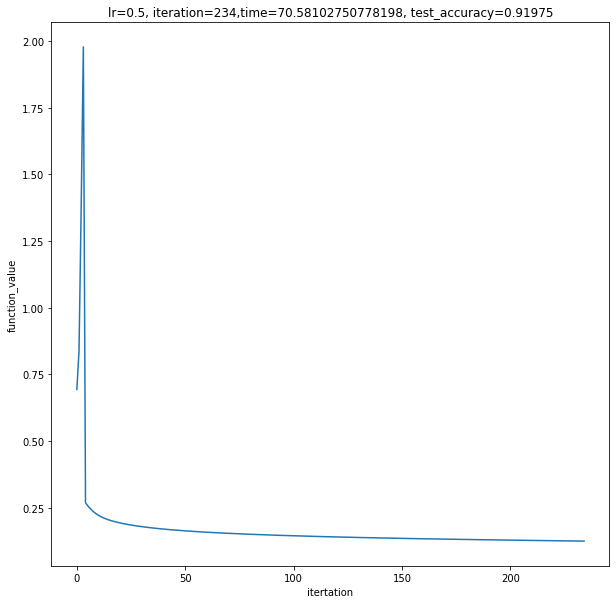

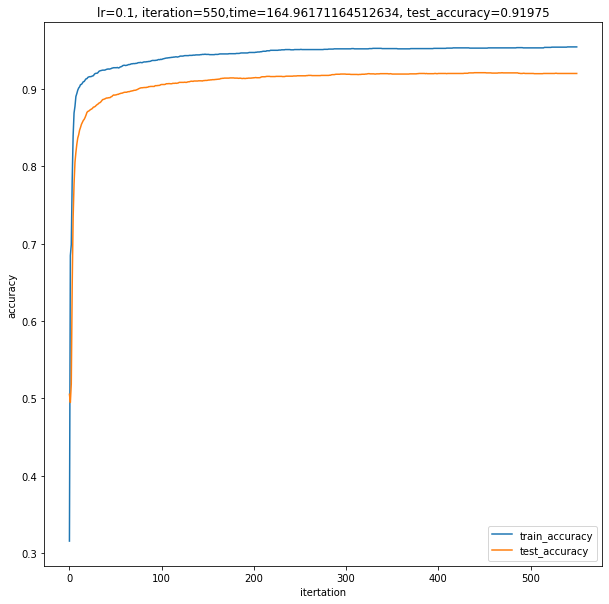

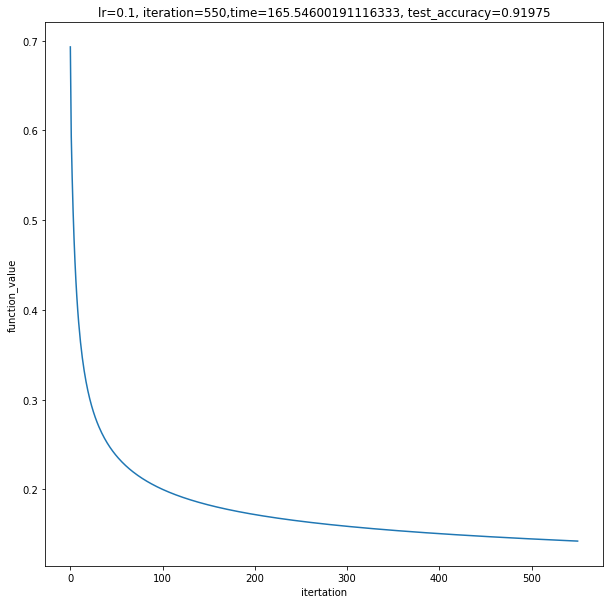

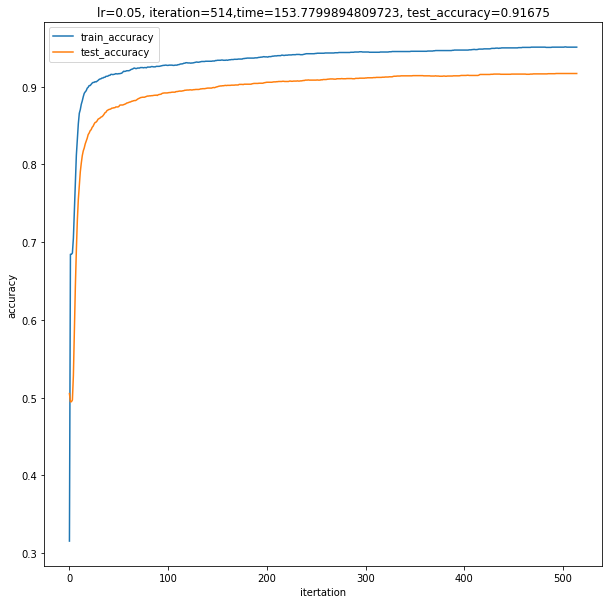

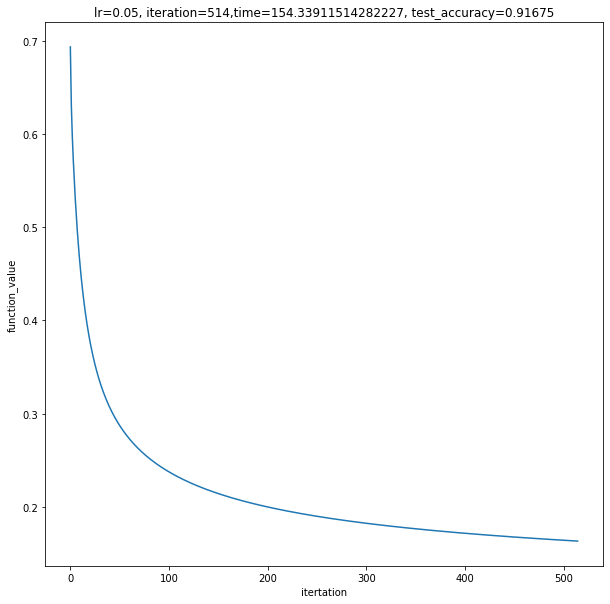

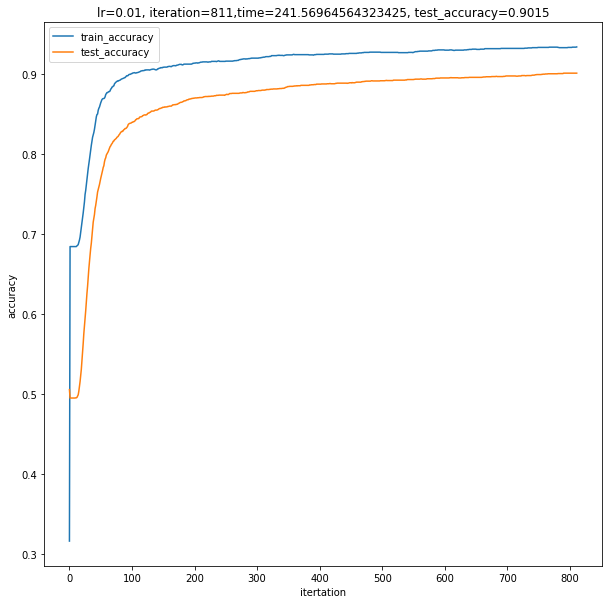

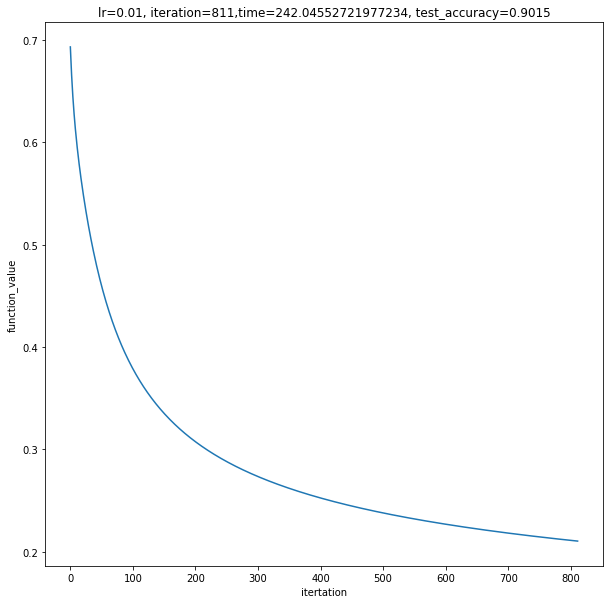

In [ ]:

#fixed-step-size

iteration=3000
weight=np.zeros(x_train.shape[1]) 
bias=np.zeros(1,)
threshold=0.5

lr_list=[1,0.5,0.1,0.05,0.01]

train_accuracy=[]
test_accuracy=[]
function_value=[]





for lr in lr_list:
  start=time.time()

  weight=np.zeros(x_train.shape[1]) 
  bias=np.zeros(1,)
  train_accuracy=[]
  test_accuracy=[]
  function_value=[]

  pp=0 

  for _ in range(iteration):
    sum=0
    for data,label in zip(x_train,y_train): 
      sum += function(data,label,weight,bias)

    sum=sum/x_train.shape[0]
  
    a= accuracy(prediction(x_train,weight,bias,threshold=threshold),y_train)
    b= accuracy(prediction(x_test,weight,bias,threshold=threshold),y_test)
    train_accuracy.append(a) 
    test_accuracy.append(b)
    function_value.append(sum)

    try:
      if test_accuracy[-2]==b:
        pp+=1

        if pp>20: 
          break
      else:
        pp=0
    except:
      pass


    weight, bias = GD2(x_train,y_train,weight,bias,lr=lr) 
    
  plt.figure(figsize=(10,10))
  o=len(train_accuracy)

  plt.plot(list(range(o)),train_accuracy)

  plt.plot(list(range(o)),test_accuracy)

  plt.legend(['train_accuracy','test_accuracy'])
  plt.title('lr={}, iteration={},time={}, test_accuracy={}'.format(lr,_,time.time()-start,test_accuracy[-2]))
  plt.xlabel('itertation')
  plt.ylabel('accuracy')
  plt.savefig('/content/drive/MyDrive/AI_mathematic/fixed-step-size_accuarcy    lr={},  iteration={},time={} ,test_accuracy[-2]={}.jpg'.format(lr,_,time.time()-start,test_accuracy[-2]))
  plt.show()

  plt.figure(figsize=(10,10))

  plt.plot(list(range(len(function_value))),function_value)
  plt.xlabel('itertation')
  plt.ylabel('function_value')
  plt.title('lr={}, iteration={},time={}, test_accuracy={}'.format(lr,_,time.time()-start,test_accuracy[-2]))
  plt.savefig('/content/drive/MyDrive/AI_mathematic/fixed-step-size_function_value    lr={}, iteration={},time={},test_accuracy[-2]={}.jpg'.format(lr,_,time.time()-start,test_accuracy[-2]))



##backtracking line search

참고: https://wikidocs.net/18184

0 0.6931471805599209
lr:  0.1500946352969992
train_accuracy 0.845625
test_accuracy 0.74175
1 0.5075426655494352
lr:  0.81
train_accuracy 0.5371875
test_accuracy 0.65725
2 0.8142385842458536
lr:  0.16677181699666577
train_accuracy 0.91125
test_accuracy 0.87475
3 0.271439599871658
train_accuracy 0.9221875
test_accuracy 0.90025
4 0.24310606970531556
lr:  0.25418658283290013
train_accuracy 0.9253125
test_accuracy 0.891
5 0.23093928059649843
train_accuracy 0.9315625
test_accuracy 0.902
6 0.21379830558947377
train_accuracy 0.928125
test_accuracy 0.91025
7 0.21114474965195654
lr:  0.28242953648100017
train_accuracy 0.936875
test_accuracy 0.9045
8 0.19913104307045418
train_accuracy 0.9415625
test_accuracy 0.9075
9 0.191075598824476
train_accuracy 0.9434375
test_accuracy 0.911
10 0.18473864197447795
train_accuracy 0.944375
test_accuracy 0.9145
11 0.17985953273408295
lr:  0.6561000000000001
train_accuracy 0.945
test_accuracy 0.91575
12 0.17700598891603125
lr:  0.5904900000000002
train_accuracy 0

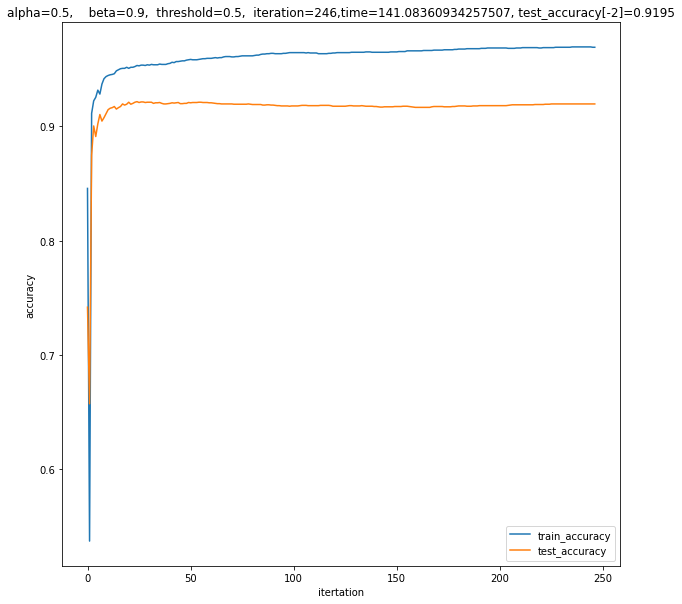

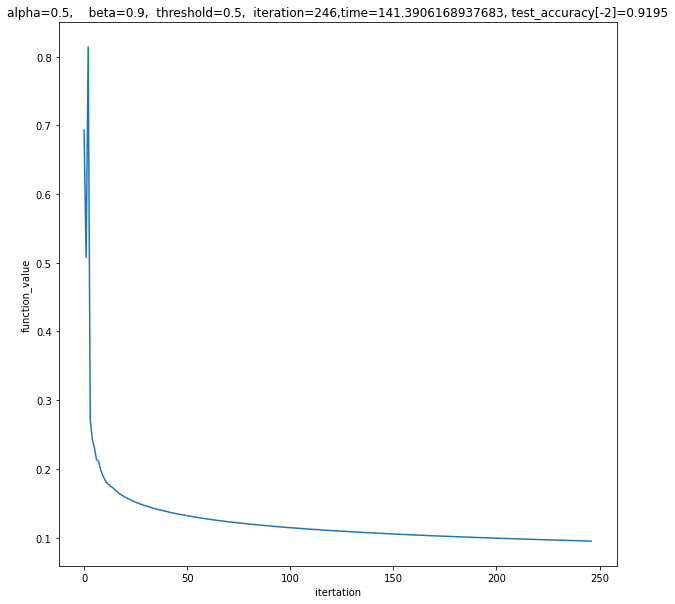

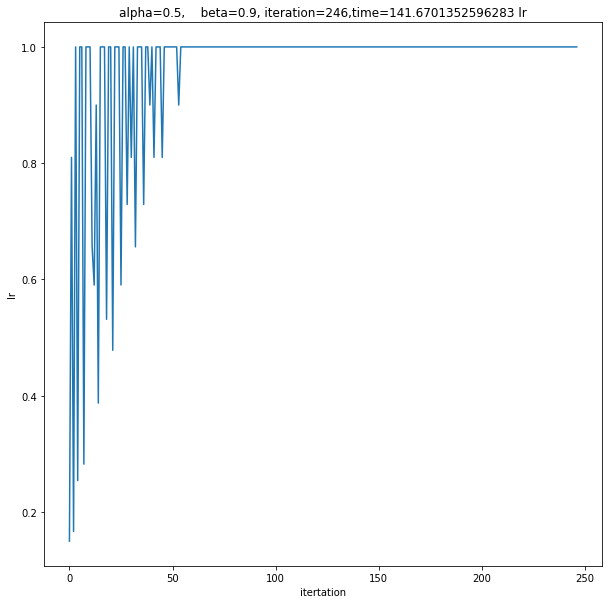

0 0.6931471805599209
lr:  0.13421772800000006
train_accuracy 0.7890625
test_accuracy 0.65975
1 0.5186482659990732
train_accuracy 0.8175
test_accuracy 0.8605
2 0.42248538682757447
lr:  0.1677721600000001
train_accuracy 0.915
test_accuracy 0.87825
3 0.2642521770348041
train_accuracy 0.924375
test_accuracy 0.9
4 0.23708603183250193
lr:  0.2621440000000001
train_accuracy 0.92625
test_accuracy 0.89125
5 0.2275275144380371
train_accuracy 0.9328125
test_accuracy 0.9025
6 0.21154337257623607
train_accuracy 0.929375
test_accuracy 0.91075
7 0.2092110500040978
lr:  0.2621440000000001
train_accuracy 0.9378125
test_accuracy 0.9055
8 0.19779308446887384
train_accuracy 0.941875
test_accuracy 0.908
9 0.19003039757010573
train_accuracy 0.9434375
test_accuracy 0.91075
10 0.1839300834186329
train_accuracy 0.943125
test_accuracy 0.9165
11 0.18010063710787916
lr:  0.32768000000000014
train_accuracy 0.9453125
test_accuracy 0.9135
12 0.177380388541777
train_accuracy 0.9459375
test_accuracy 0.913
13 0.1733642

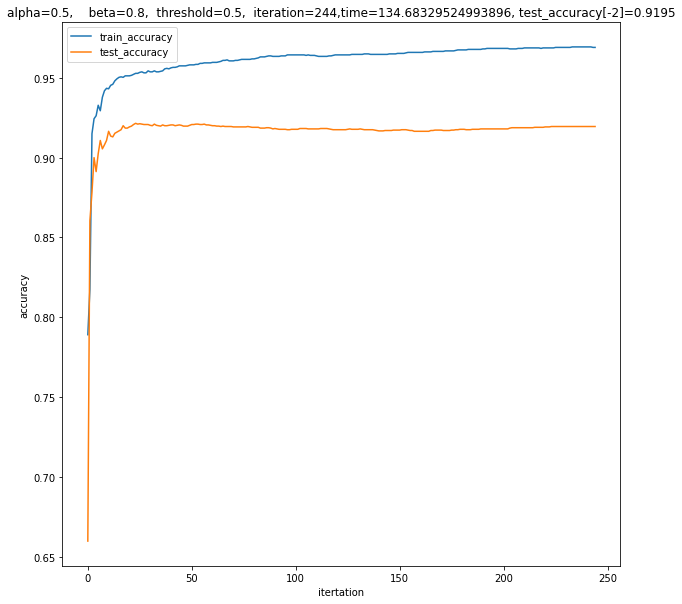

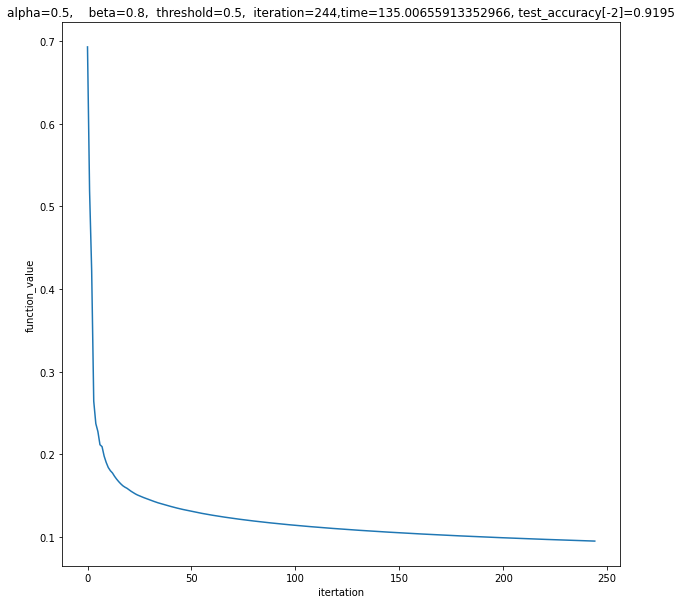

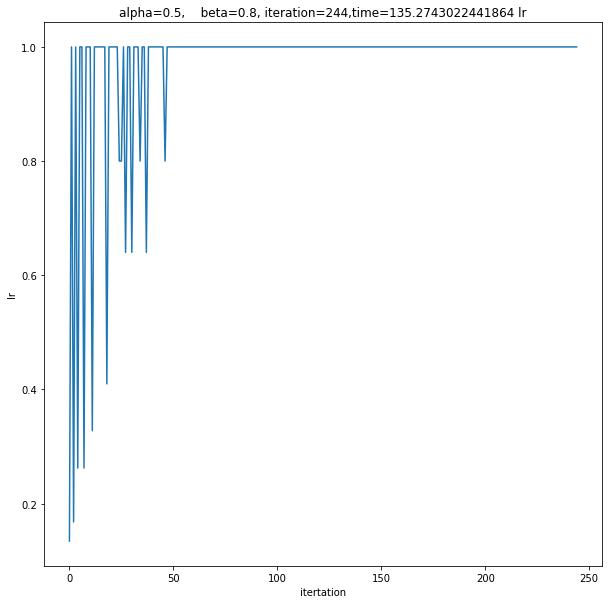

0 0.6931471805599209
lr:  0.11764899999999995
train_accuracy 0.735625
test_accuracy 0.5785
1 0.5317836338625331
train_accuracy 0.90625
test_accuracy 0.85175
2 0.28027632785380063
lr:  0.24009999999999992
train_accuracy 0.9165625
test_accuracy 0.878
3 0.2639585675039232
train_accuracy 0.9215625
test_accuracy 0.8745
4 0.23774429047402898
lr:  0.24009999999999992
train_accuracy 0.926875
test_accuracy 0.892
5 0.22759398567105202
train_accuracy 0.933125
test_accuracy 0.90025
6 0.2113881941529808
train_accuracy 0.936875
test_accuracy 0.90125
7 0.20036857431257055
train_accuracy 0.9365625
test_accuracy 0.8885
8 0.1989892376702576
lr:  0.24009999999999992
train_accuracy 0.941875
test_accuracy 0.90825
9 0.19013745101104434
train_accuracy 0.94375
test_accuracy 0.90975
10 0.18414223621987638
lr:  0.7
train_accuracy 0.944375
test_accuracy 0.909
11 0.1808086890287152
lr:  0.48999999999999994
train_accuracy 0.945
test_accuracy 0.91175
12 0.17810267614807596
train_accuracy 0.945
test_accuracy 0.90975

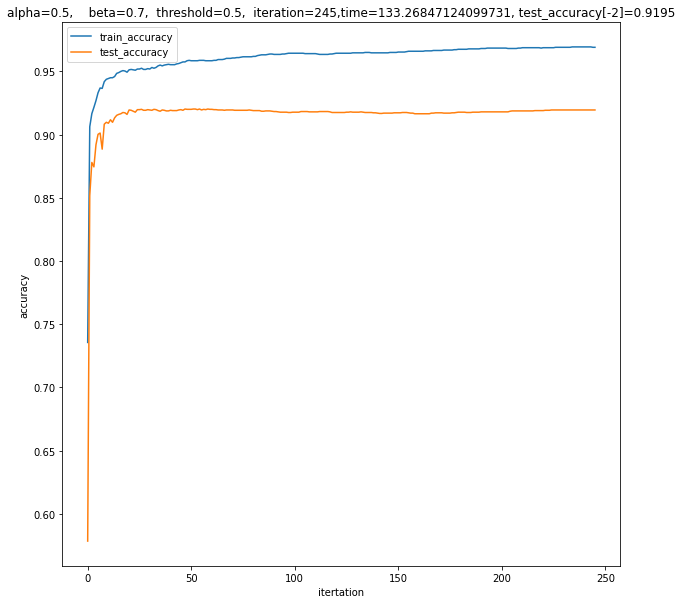

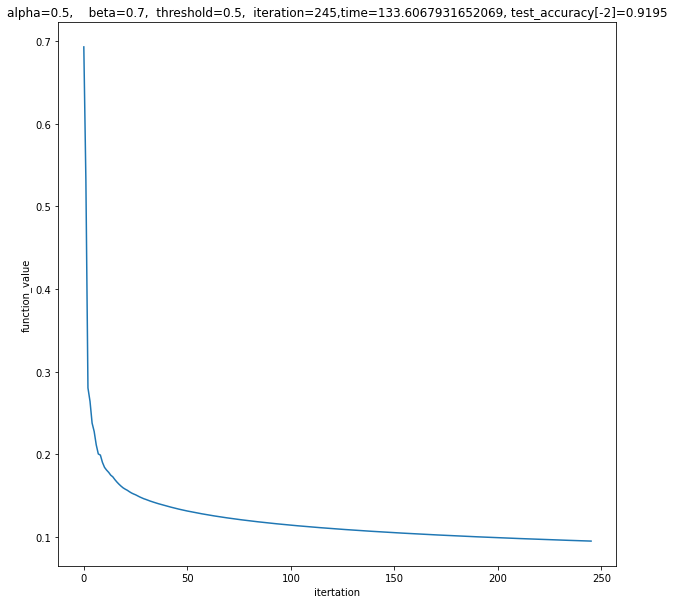

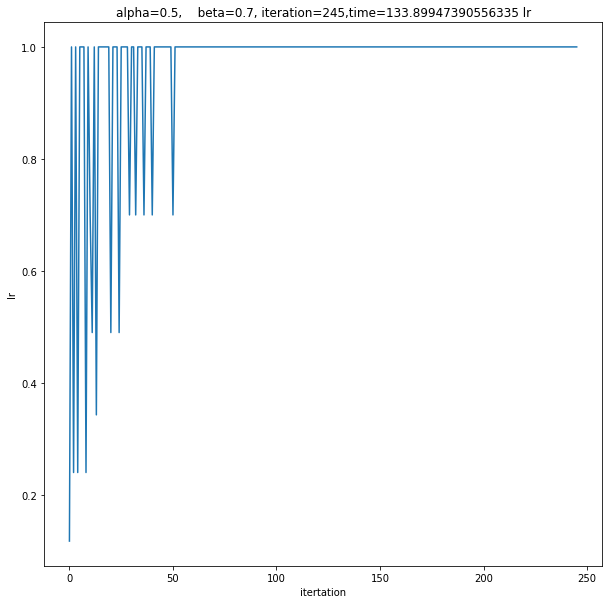

0 0.6931471805599209
lr:  0.1296
train_accuracy 0.774375
test_accuracy 0.63175
1 0.5221795541387231
train_accuracy 0.8840625
test_accuracy 0.89425
2 0.32894680204558563
lr:  0.1296
train_accuracy 0.9159375
test_accuracy 0.881
3 0.2681848063998427
lr:  0.6
train_accuracy 0.9190625
test_accuracy 0.898
4 0.2529198177254678
lr:  0.216
train_accuracy 0.9240625
test_accuracy 0.88875
5 0.23984499311251742
train_accuracy 0.930625
test_accuracy 0.89625
6 0.21912153289101627
train_accuracy 0.935
test_accuracy 0.90175
7 0.2056743335166241
train_accuracy 0.9390625
test_accuracy 0.9035
8 0.1961978147687809
train_accuracy 0.9365625
test_accuracy 0.89075
9 0.1957850955628271
lr:  0.216
train_accuracy 0.94375
test_accuracy 0.90875
10 0.18723421807804275
train_accuracy 0.94375
test_accuracy 0.90675
11 0.18262457824351927
lr:  0.36
train_accuracy 0.94375
test_accuracy 0.91225
12 0.1798011943907271
train_accuracy 0.945625
test_accuracy 0.913
13 0.17542402134241558
train_accuracy 0.9475
test_accuracy 0.91

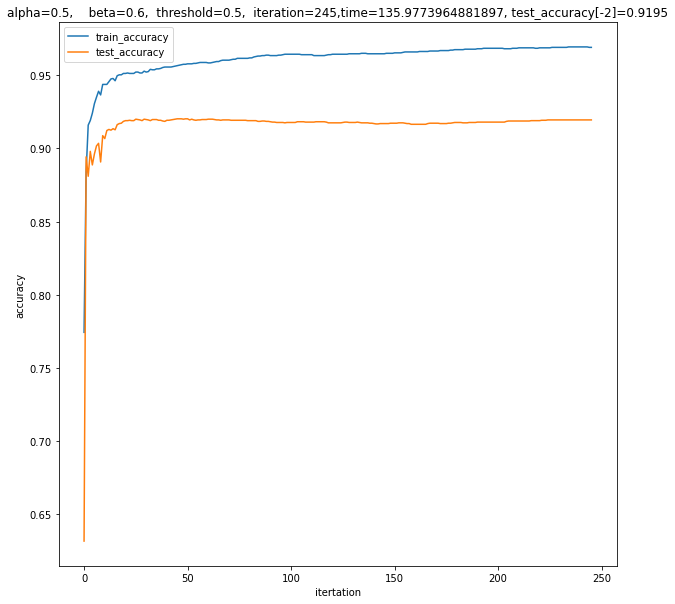

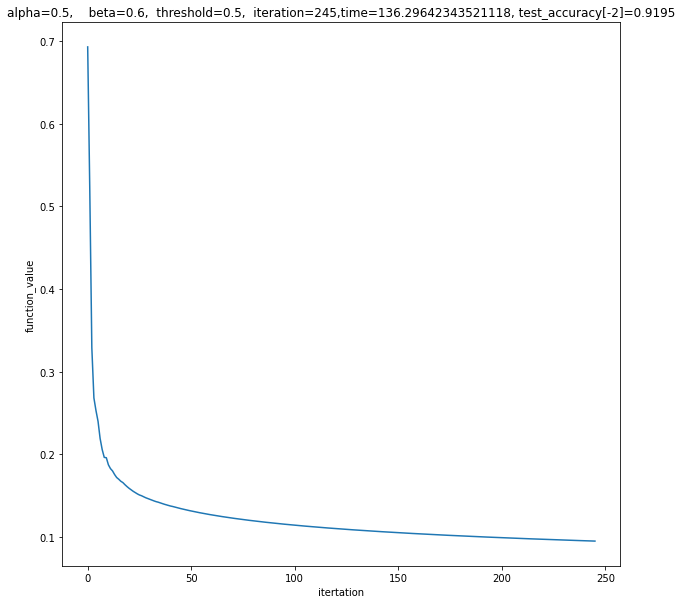

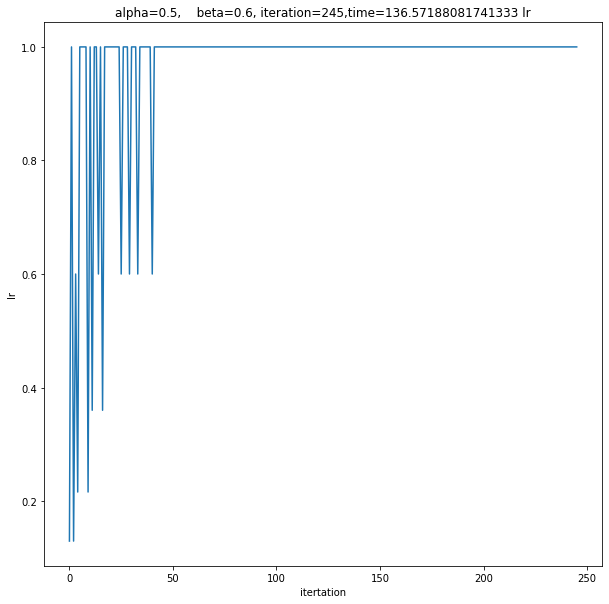

0 0.6931471805599209
lr:  0.125
train_accuracy 0.7590625
test_accuracy 0.60875
1 0.5258037417542556
train_accuracy 0.9096875
test_accuracy 0.89125
2 0.2846159999159916
lr:  0.125
train_accuracy 0.915625
test_accuracy 0.87875
3 0.26885948461944187
train_accuracy 0.9103125
test_accuracy 0.90375
4 0.26002967118405845
lr:  0.125
train_accuracy 0.92375
test_accuracy 0.89525
5 0.23290280429967805
lr:  0.25
train_accuracy 0.926875
test_accuracy 0.892
6 0.22694159506582082
train_accuracy 0.9325
test_accuracy 0.90125
7 0.21097158161360516
train_accuracy 0.9371875
test_accuracy 0.90725
8 0.20017201672580714
lr:  0.5
train_accuracy 0.93875
test_accuracy 0.90825
9 0.1956772091360812
train_accuracy 0.9365625
test_accuracy 0.913
10 0.19228240811493735
lr:  0.25
train_accuracy 0.9428125
test_accuracy 0.91
11 0.18669261546050617
train_accuracy 0.9440625
test_accuracy 0.91175
12 0.1812204961235862
train_accuracy 0.943125
test_accuracy 0.91675
13 0.178043749857944
lr:  0.25
train_accuracy 0.9453125
test

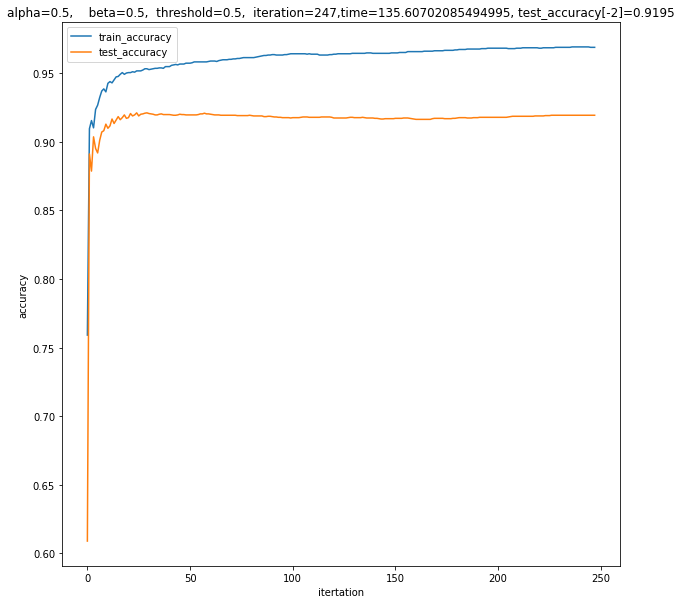

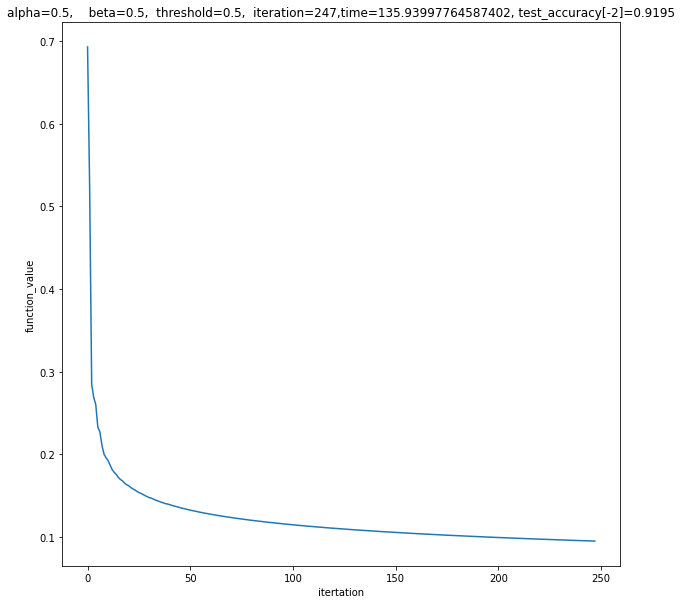

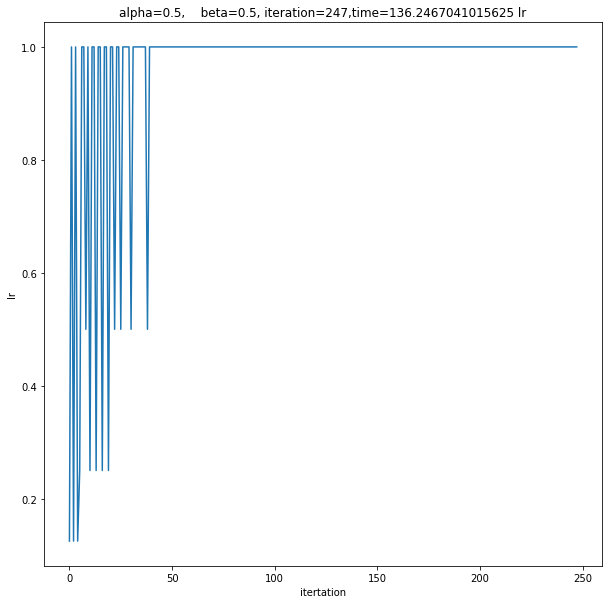

0 0.6931471805599209
lr:  0.1853020188851842
train_accuracy 0.9
test_accuracy 0.85475
1 0.49184917859965244
lr:  0.25418658283290013
train_accuracy 0.90125
test_accuracy 0.88775
2 0.3988248603501512
lr:  0.1853020188851842
train_accuracy 0.9065625
test_accuracy 0.8615
3 0.34453863571804283
train_accuracy 0.7421875
test_accuracy 0.8065
4 0.5138151030903612
lr:  0.22876792454961012
train_accuracy 0.92125
test_accuracy 0.887
5 0.24568898012550597
train_accuracy 0.925625
test_accuracy 0.9045
6 0.2279553586094358
lr:  0.31381059609000017
train_accuracy 0.93
test_accuracy 0.89825
7 0.21758166739073964
train_accuracy 0.9321875
test_accuracy 0.91
8 0.20733054128382988
lr:  0.38742048900000015
train_accuracy 0.9371875
test_accuracy 0.90675
9 0.2007729228329623
train_accuracy 0.9340625
test_accuracy 0.91225
10 0.1965887671888636
lr:  0.38742048900000015
train_accuracy 0.9428125
test_accuracy 0.91
11 0.18953745542644715
train_accuracy 0.939375
test_accuracy 0.915
12 0.1849113405539223
lr:  0.4304

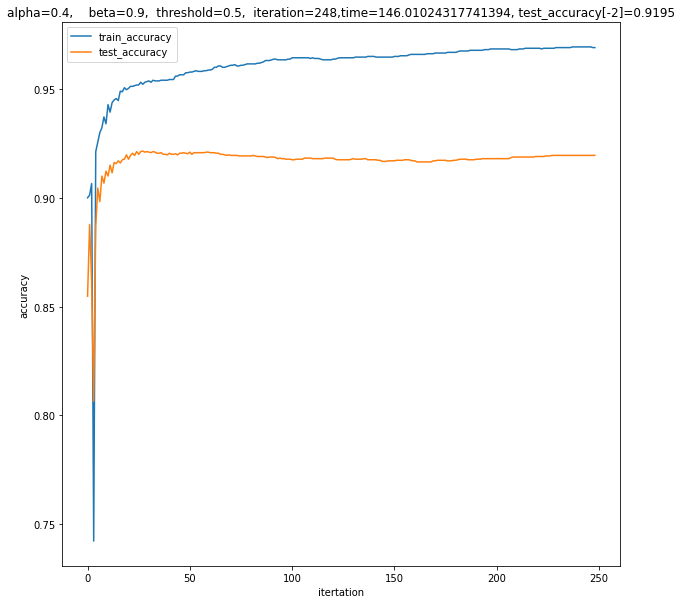

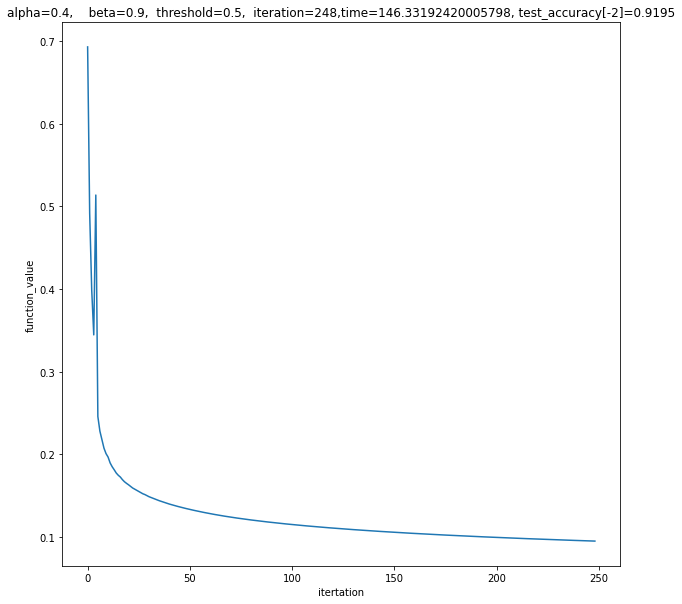

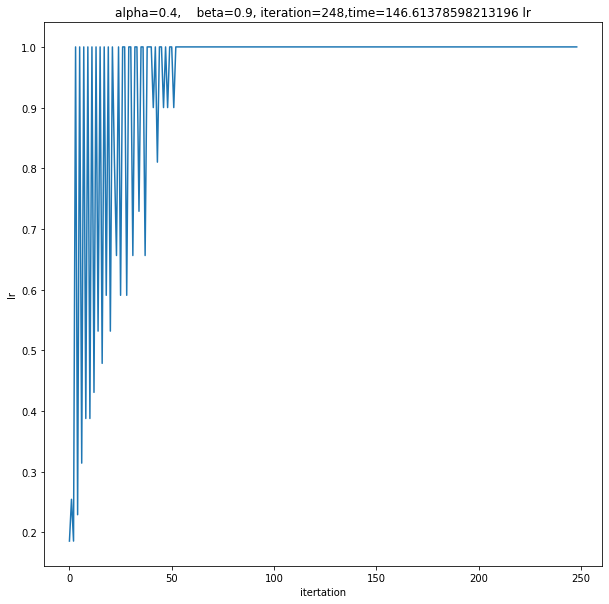

0 0.6931471805599209
lr:  0.1677721600000001
train_accuracy 0.88375
test_accuracy 0.81275
1 0.49776989067063176
lr:  0.40960000000000013
train_accuracy 0.8025
test_accuracy 0.847
2 0.4627273845400625
lr:  0.1677721600000001
train_accuracy 0.9084375
test_accuracy 0.864
3 0.3204505604772481
train_accuracy 0.9009375
test_accuracy 0.9015
4 0.28542363577309177
lr:  0.2097152000000001
train_accuracy 0.924375
test_accuracy 0.8875
5 0.24597442509206385
train_accuracy 0.929375
test_accuracy 0.89525
6 0.22255130395837391
train_accuracy 0.93375
test_accuracy 0.903
7 0.20798867115551592
train_accuracy 0.9340625
test_accuracy 0.91175
8 0.20064565869762718
lr:  0.32768000000000014
train_accuracy 0.94
test_accuracy 0.907
9 0.19488774052768762
train_accuracy 0.94375
test_accuracy 0.91075
10 0.1878017629819241
train_accuracy 0.94
test_accuracy 0.91625
11 0.1845769213284577
lr:  0.40960000000000013
train_accuracy 0.9440625
test_accuracy 0.9125
12 0.17992919759935358
train_accuracy 0.945625
test_accuracy

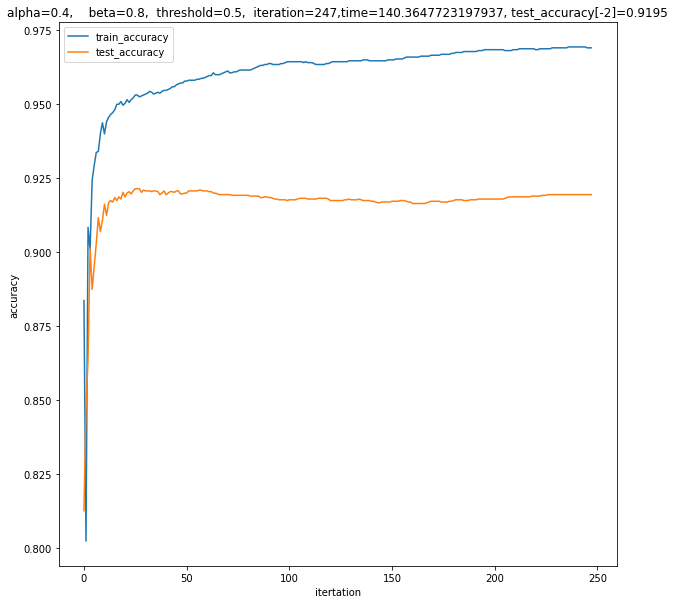

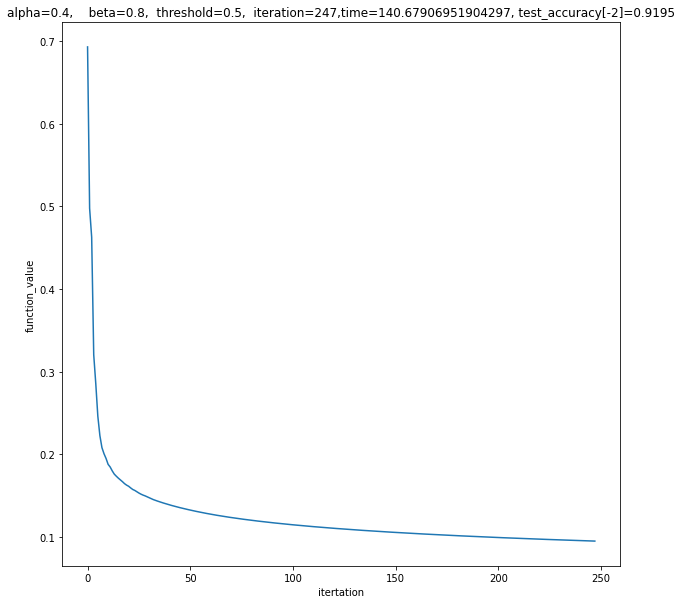

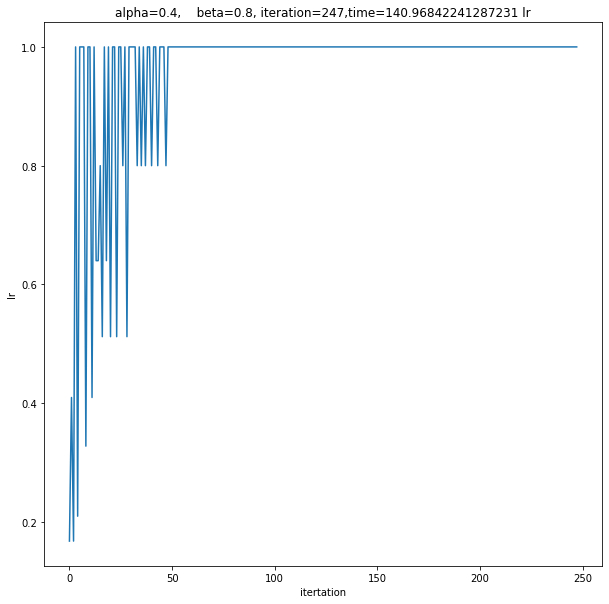

0 0.6931471805599209
lr:  0.16806999999999994
train_accuracy 0.8840625
test_accuracy 0.8125
1 0.49763472572020484
lr:  0.48999999999999994
train_accuracy 0.64375
test_accuracy 0.73525
2 0.586058048163896
lr:  0.16806999999999994
train_accuracy 0.90875
test_accuracy 0.86475
3 0.3053199945542092
train_accuracy 0.9203125
test_accuracy 0.89525
4 0.25338859246608975
lr:  0.24009999999999992
train_accuracy 0.9246875
test_accuracy 0.889
5 0.24217820797413256
train_accuracy 0.930625
test_accuracy 0.9
6 0.22062797865709374
train_accuracy 0.9209375
test_accuracy 0.9095
7 0.2268025336832848
lr:  0.24009999999999992
train_accuracy 0.9359375
test_accuracy 0.90325
8 0.20364997702993054
train_accuracy 0.9396875
test_accuracy 0.90825
9 0.19452916654223035
train_accuracy 0.9384375
test_accuracy 0.91425
10 0.18949999792810768
lr:  0.3429999999999999
train_accuracy 0.9434375
test_accuracy 0.90975
11 0.1853224834318721
train_accuracy 0.9440625
test_accuracy 0.91225
12 0.18003330204469362
train_accuracy 0.

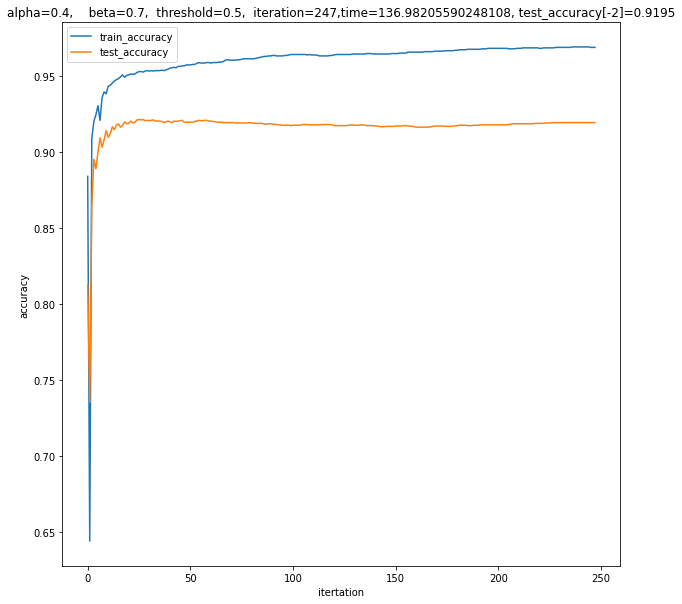

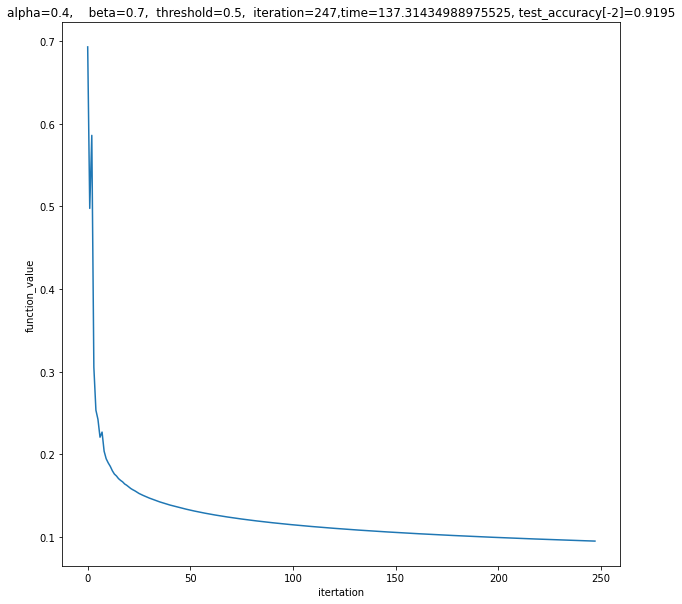

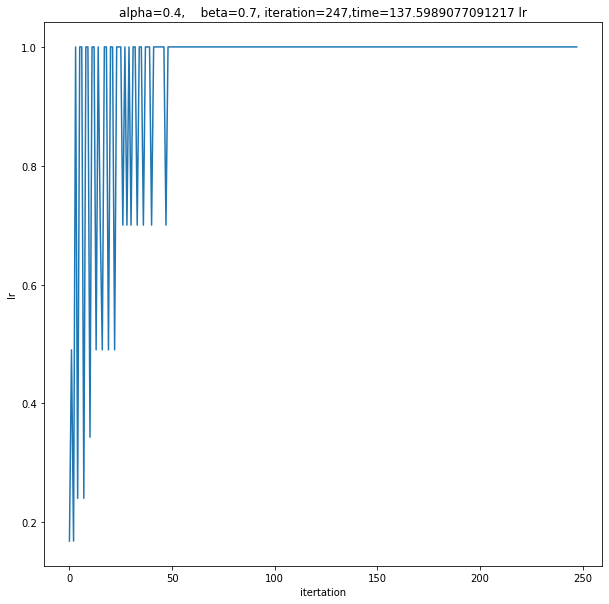

0 0.6931471805599209
lr:  0.1296
train_accuracy 0.774375
test_accuracy 0.63175
1 0.5221795541387231
train_accuracy 0.8840625
test_accuracy 0.89425
2 0.32894680204558563
lr:  0.216
train_accuracy 0.9159375
test_accuracy 0.8795
3 0.26366390035134246
train_accuracy 0.925
test_accuracy 0.89975
4 0.23626986030078798
lr:  0.216
train_accuracy 0.9265625
test_accuracy 0.89125
5 0.22804989615014906
train_accuracy 0.9325
test_accuracy 0.90125
6 0.211708908982431
train_accuracy 0.9371875
test_accuracy 0.9075
7 0.20062744751483128
train_accuracy 0.9315625
test_accuracy 0.91275
8 0.19991420368162907
lr:  0.36
train_accuracy 0.943125
test_accuracy 0.9095
9 0.1894980986891464
train_accuracy 0.9421875
test_accuracy 0.91425
10 0.1841233528836169
lr:  0.36
train_accuracy 0.9440625
test_accuracy 0.9115
11 0.1815476048860675
train_accuracy 0.945
test_accuracy 0.91375
12 0.17689848464557995
train_accuracy 0.945625
test_accuracy 0.91675
13 0.17311241672062788
train_accuracy 0.9446875
test_accuracy 0.918
14 

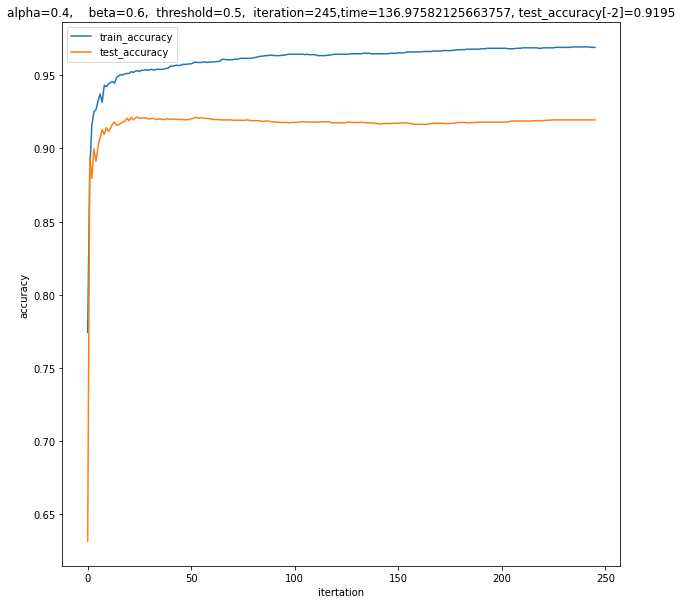

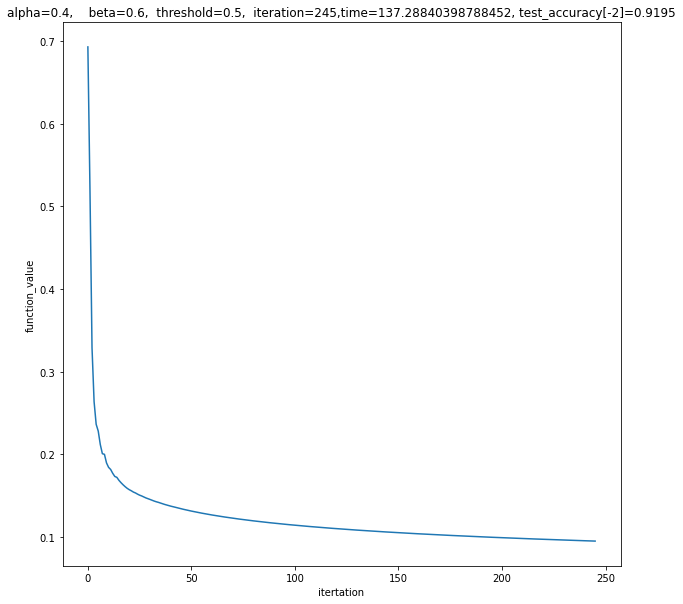

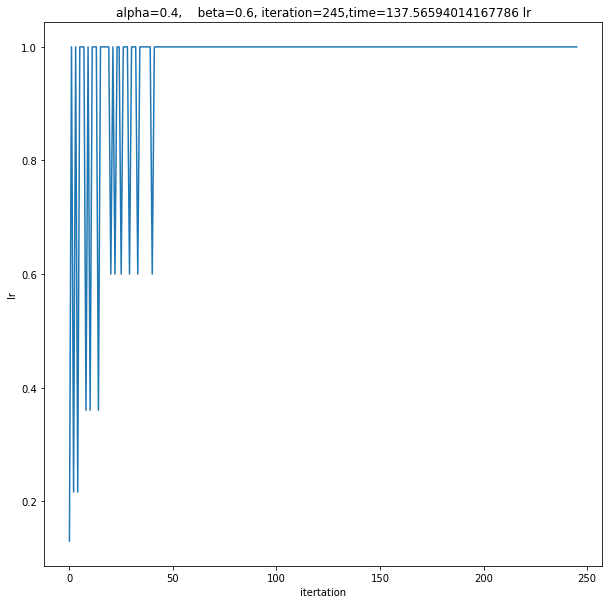

0 0.6931471805599209
lr:  0.125
train_accuracy 0.7590625
test_accuracy 0.60875
1 0.5258037417542556
train_accuracy 0.9096875
test_accuracy 0.89125
2 0.2846159999159916
lr:  0.25
train_accuracy 0.916875
test_accuracy 0.88125
3 0.2633321307529157
train_accuracy 0.9140625
test_accuracy 0.90375
4 0.2519041018165627
lr:  0.25
train_accuracy 0.926875
test_accuracy 0.892
5 0.2268608250188807
train_accuracy 0.9328125
test_accuracy 0.9025
6 0.21102951240606477
train_accuracy 0.93
test_accuracy 0.911
7 0.2065087416524477
lr:  0.25
train_accuracy 0.9378125
test_accuracy 0.90575
8 0.19758299876849097
train_accuracy 0.943125
test_accuracy 0.909
9 0.18987179563574713
train_accuracy 0.943125
test_accuracy 0.91425
10 0.18429673396698448
lr:  0.5
train_accuracy 0.94375
test_accuracy 0.912
11 0.18119960791595185
train_accuracy 0.9428125
test_accuracy 0.9165
12 0.17820729084602147
lr:  0.25
train_accuracy 0.9453125
test_accuracy 0.914
13 0.17550011451312733
train_accuracy 0.9471875
test_accuracy 0.916
14

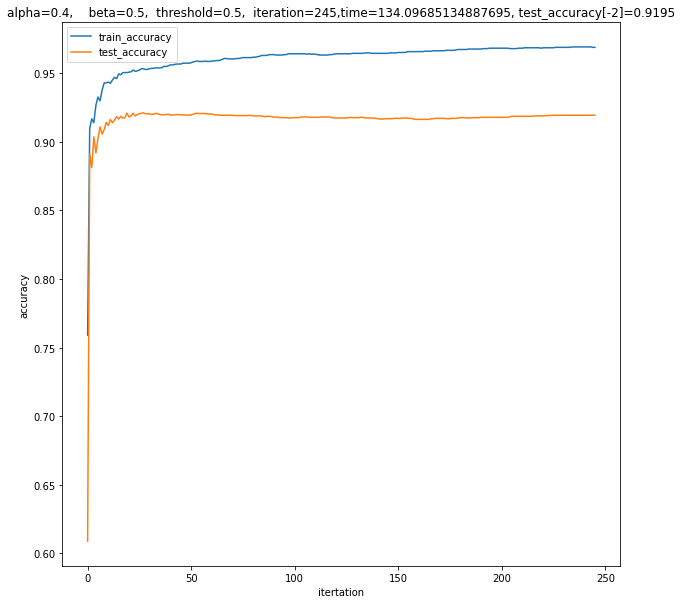

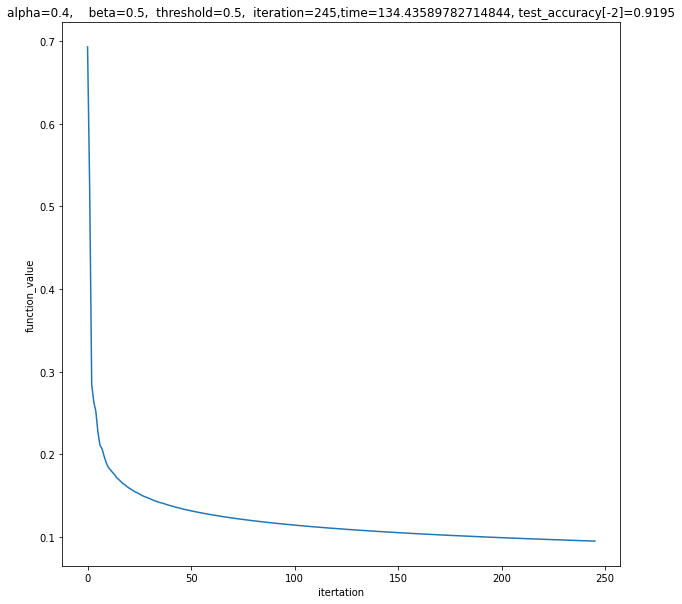

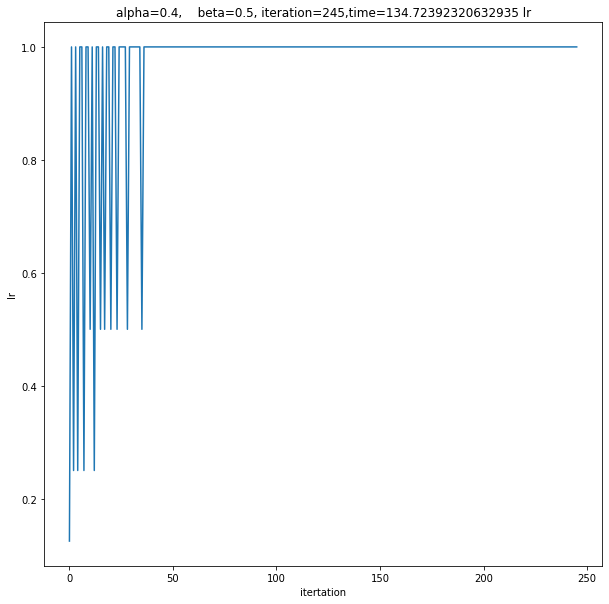

0 0.6931471805599209
lr:  0.2058911320946491
train_accuracy 0.8975
test_accuracy 0.88175
1 0.4911757283407002
lr:  0.22876792454961012
train_accuracy 0.9034375
test_accuracy 0.88475
2 0.39698712362815575
lr:  0.22876792454961012
train_accuracy 0.9096875
test_accuracy 0.87825
3 0.34095518316797957
lr:  0.43046721000000016
train_accuracy 0.8934375
test_accuracy 0.897
4 0.32834481774313207
lr:  0.22876792454961012
train_accuracy 0.9184375
test_accuracy 0.88225
5 0.27632195147375793
train_accuracy 0.8653125
test_accuracy 0.88625
6 0.3399039615127336
lr:  0.28242953648100017
train_accuracy 0.9265625
test_accuracy 0.8965
7 0.22942788223635752
train_accuracy 0.901875
test_accuracy 0.90475
8 0.2597469644716613
lr:  0.34867844010000015
train_accuracy 0.9325
test_accuracy 0.905
9 0.20784480089247995
lr:  0.6561000000000001
train_accuracy 0.9321875
test_accuracy 0.91
10 0.20346152010529406
lr:  0.43046721000000016
train_accuracy 0.9378125
test_accuracy 0.909
11 0.19667503918139218
train_accuracy 

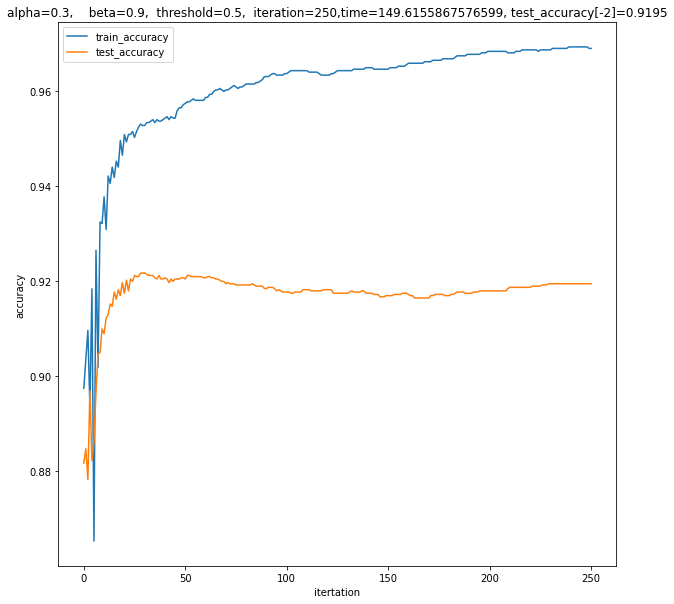

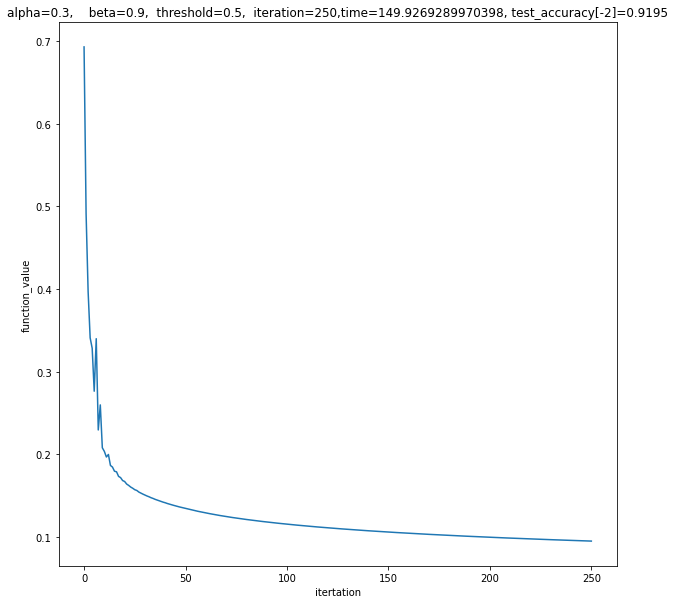

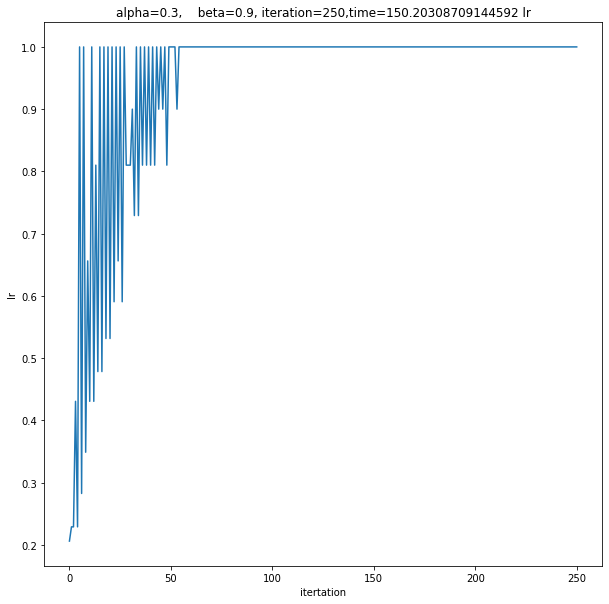

0 0.6931471805599209
lr:  0.2097152000000001
train_accuracy 0.895
test_accuracy 0.88475
1 0.49191924653169944
lr:  0.2097152000000001
train_accuracy 0.9053125
test_accuracy 0.87875
2 0.3944991140590688
lr:  0.2621440000000001
train_accuracy 0.909375
test_accuracy 0.8845
3 0.3418718019537355
lr:  0.32768000000000014
train_accuracy 0.9090625
test_accuracy 0.89225
4 0.31072522389576346
lr:  0.2621440000000001
train_accuracy 0.9175
test_accuracy 0.88325
5 0.2812493166258772
lr:  0.6400000000000001
train_accuracy 0.90125
test_accuracy 0.90325
6 0.2869556149425509
lr:  0.2621440000000001
train_accuracy 0.9246875
test_accuracy 0.8925
7 0.24216388798326777
train_accuracy 0.914375
test_accuracy 0.90675
8 0.24564345717520994
lr:  0.32768000000000014
train_accuracy 0.9309375
test_accuracy 0.9015
9 0.21496033958169875
train_accuracy 0.91875
test_accuracy 0.90925
10 0.226689557793122
lr:  0.32768000000000014
train_accuracy 0.938125
test_accuracy 0.907
11 0.19899601426535454
train_accuracy 0.9378125

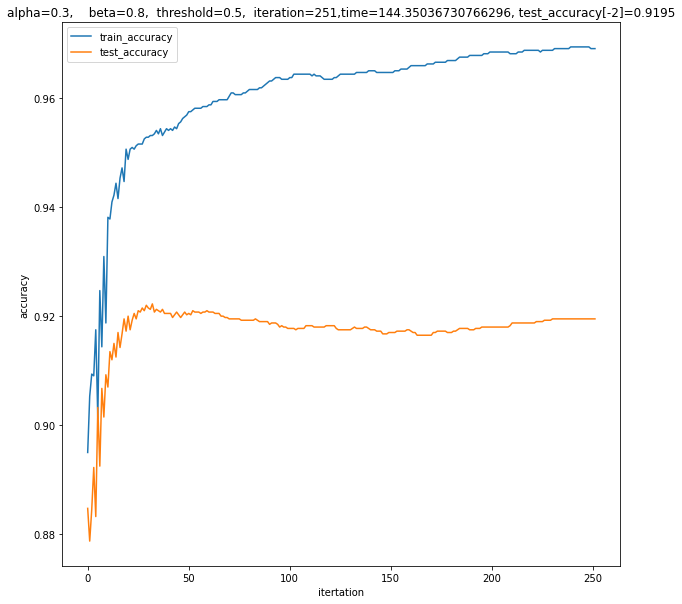

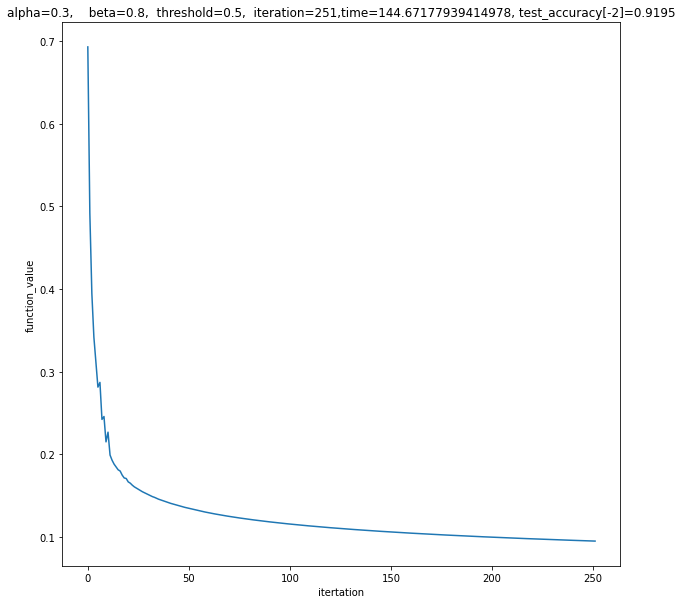

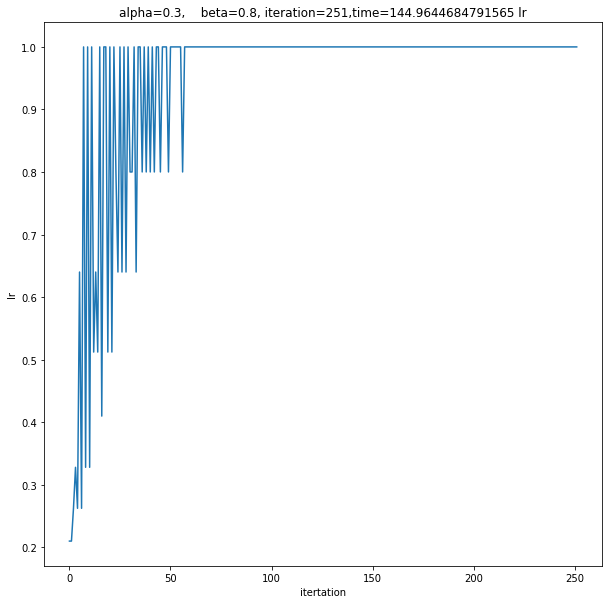

0 0.6931471805599209
lr:  0.16806999999999994
train_accuracy 0.8840625
test_accuracy 0.8125
1 0.49763472572020484
lr:  0.48999999999999994
train_accuracy 0.64375
test_accuracy 0.73525
2 0.586058048163896
lr:  0.16806999999999994
train_accuracy 0.90875
test_accuracy 0.86475
3 0.3053199945542092
train_accuracy 0.9203125
test_accuracy 0.89525
4 0.25338859246608975
lr:  0.3429999999999999
train_accuracy 0.9234375
test_accuracy 0.89225
5 0.2400023623244106
lr:  0.7
train_accuracy 0.9196875
test_accuracy 0.90625
6 0.23642940931563772
lr:  0.3429999999999999
train_accuracy 0.9303125
test_accuracy 0.90075
7 0.21853095243823722
train_accuracy 0.9115625
test_accuracy 0.908
8 0.23707950168301928
lr:  0.3429999999999999
train_accuracy 0.93625
test_accuracy 0.90675
9 0.201133507888702
train_accuracy 0.93125
test_accuracy 0.912
10 0.20109239889687752
lr:  0.3429999999999999
train_accuracy 0.9428125
test_accuracy 0.90875
11 0.18991658930648317
train_accuracy 0.943125
test_accuracy 0.912
12 0.18402424

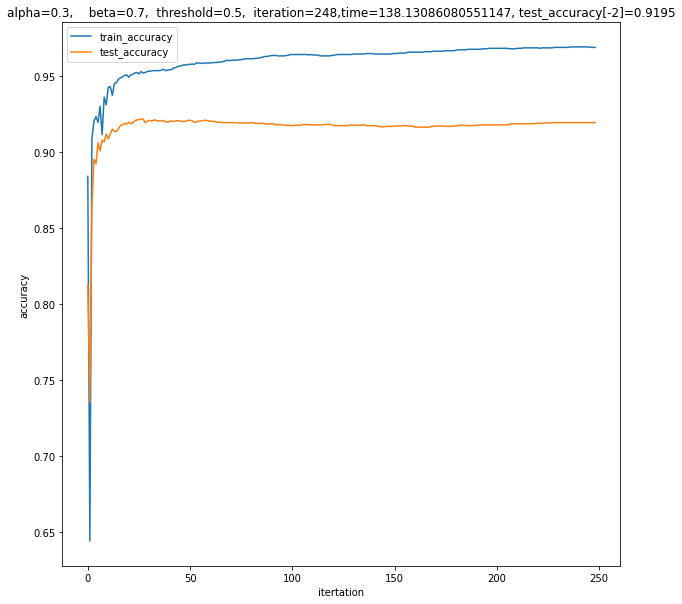

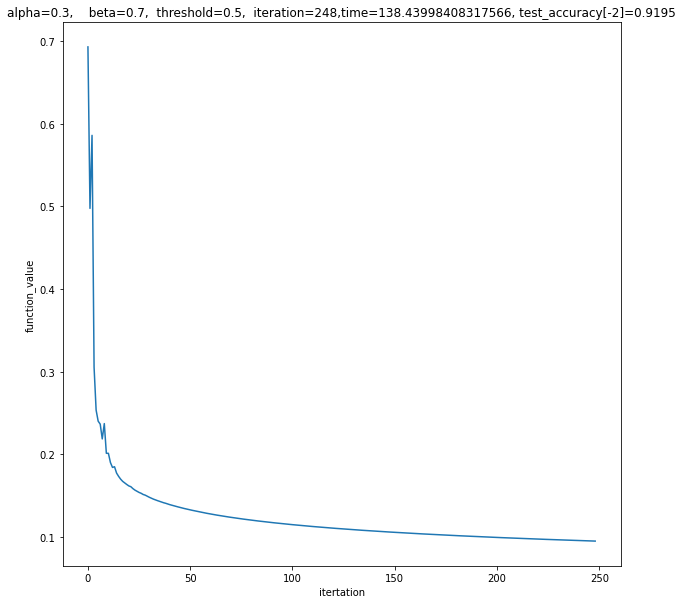

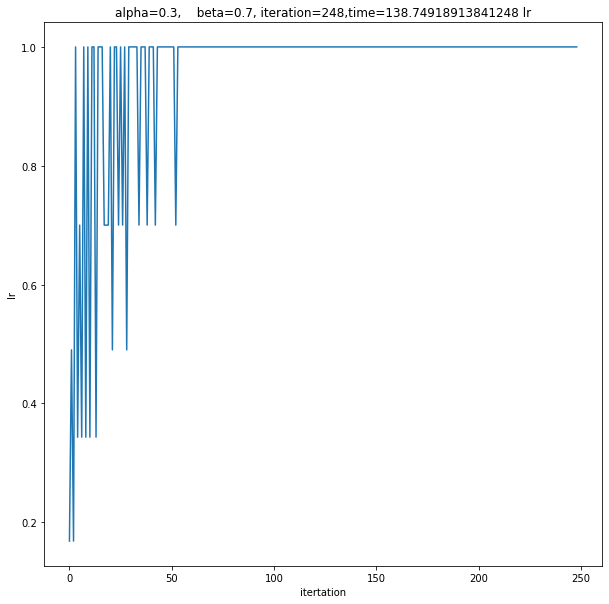

0 0.6931471805599209
lr:  0.216
train_accuracy 0.88875
test_accuracy 0.8875
1 0.493785092186463
lr:  0.1296
train_accuracy 0.8915625
test_accuracy 0.82175
2 0.4092879763543514
train_accuracy 0.9171875
test_accuracy 0.889
3 0.27072977434067114
lr:  0.36
train_accuracy 0.92
test_accuracy 0.89075
4 0.25504943511496597
lr:  0.6
train_accuracy 0.915
test_accuracy 0.9045
5 0.2518757597917222
lr:  0.216
train_accuracy 0.926875
test_accuracy 0.89175
6 0.23101252563902233
train_accuracy 0.9328125
test_accuracy 0.89975
7 0.21350265619107517
train_accuracy 0.9371875
test_accuracy 0.9065
8 0.2017255841500644
train_accuracy 0.935
test_accuracy 0.91375
9 0.19554527664875188
lr:  0.36
train_accuracy 0.9428125
test_accuracy 0.9085
10 0.1903597001353793
train_accuracy 0.943125
test_accuracy 0.91275
11 0.1843908096610134
train_accuracy 0.935625
test_accuracy 0.91575
12 0.18592353325131883
lr:  0.36
train_accuracy 0.945
test_accuracy 0.914
13 0.17732567533682725
train_accuracy 0.946875
test_accuracy 0.91

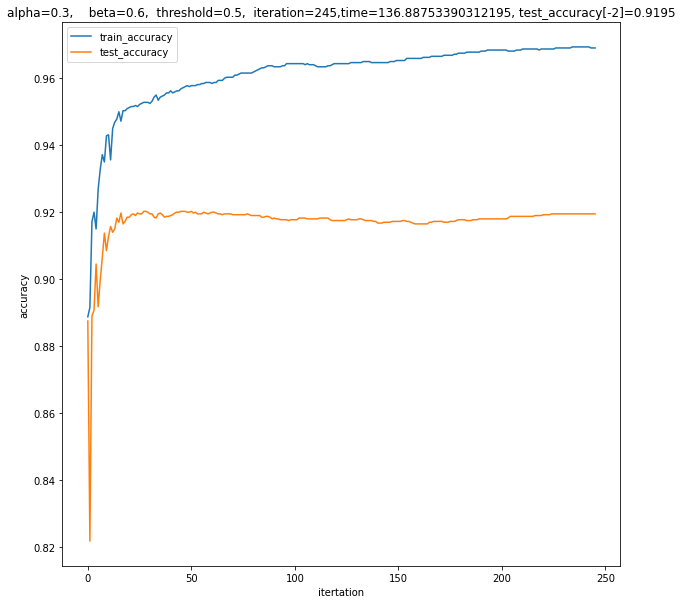

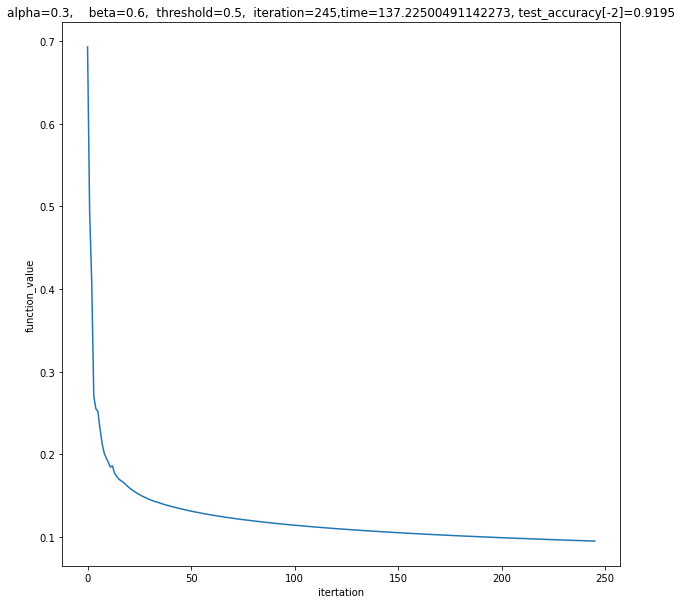

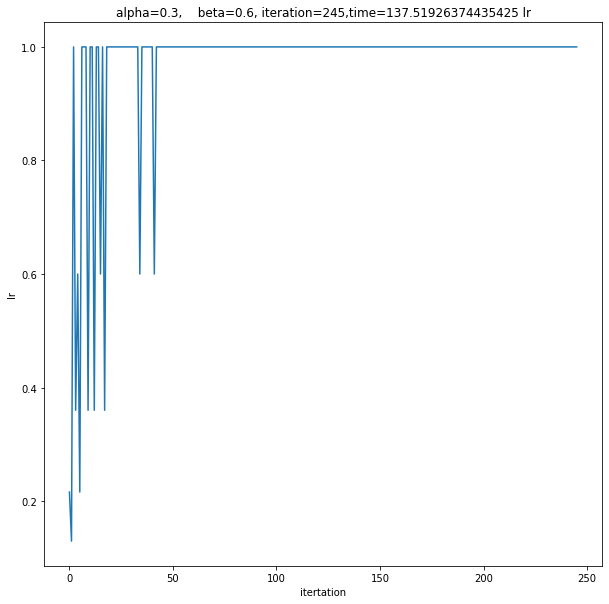

0 0.6931471805599209
lr:  0.125
train_accuracy 0.7590625
test_accuracy 0.60875
1 0.5258037417542556
train_accuracy 0.9096875
test_accuracy 0.89125
2 0.2846159999159916
lr:  0.25
train_accuracy 0.916875
test_accuracy 0.88125
3 0.2633321307529157
train_accuracy 0.9140625
test_accuracy 0.90375
4 0.2519041018165627
lr:  0.25
train_accuracy 0.926875
test_accuracy 0.892
5 0.2268608250188807
train_accuracy 0.9328125
test_accuracy 0.9025
6 0.21102951240606477
train_accuracy 0.93
test_accuracy 0.911
7 0.2065087416524477
lr:  0.25
train_accuracy 0.9378125
test_accuracy 0.90575
8 0.19758299876849097
train_accuracy 0.943125
test_accuracy 0.909
9 0.18987179563574713
train_accuracy 0.943125
test_accuracy 0.91425
10 0.18429673396698448
lr:  0.5
train_accuracy 0.94375
test_accuracy 0.912
11 0.18119960791595185
train_accuracy 0.9428125
test_accuracy 0.9165
12 0.17820729084602147
lr:  0.5
train_accuracy 0.945
test_accuracy 0.916
13 0.17462816459154848
train_accuracy 0.9434375
test_accuracy 0.9185
14 0.1

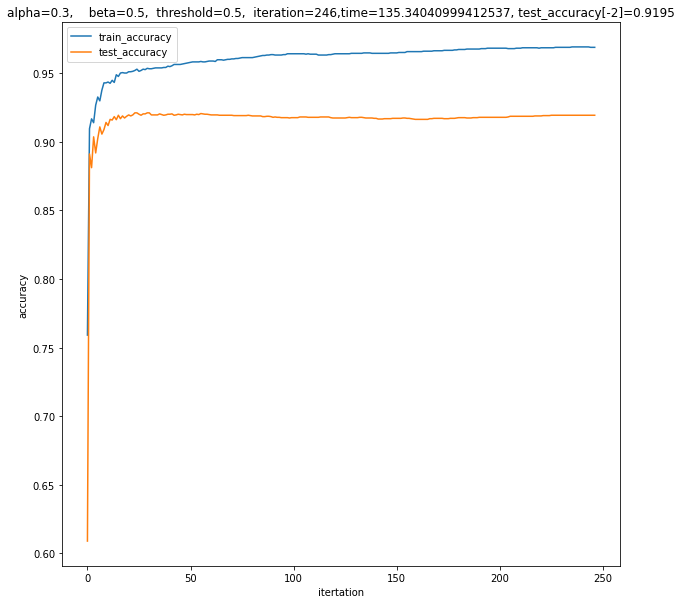

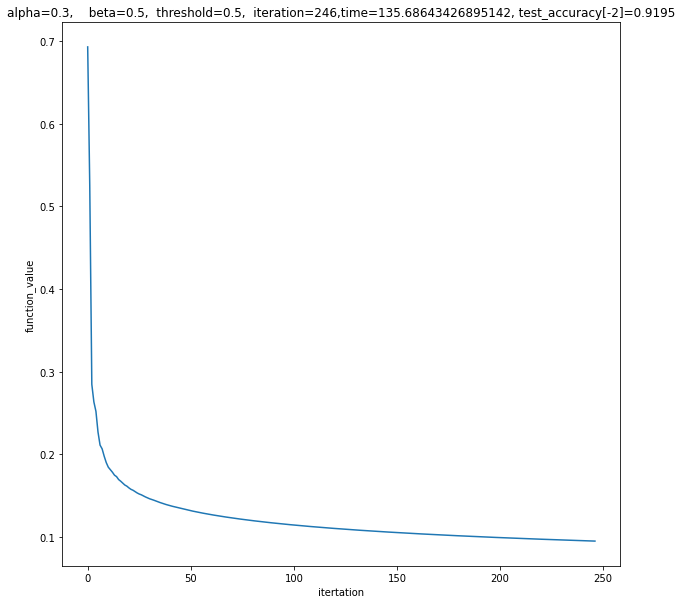

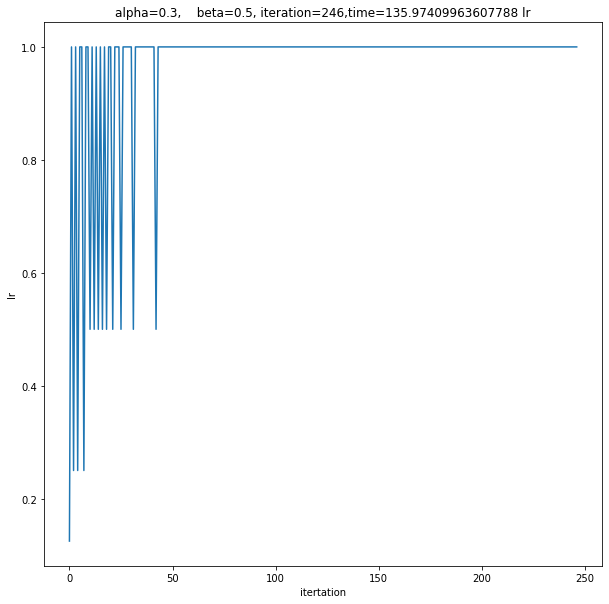

0 0.6931471805599209
lr:  0.25418658283290013
train_accuracy 0.775625
test_accuracy 0.82325
1 0.5239258837858876
lr:  0.1853020188851842
train_accuracy 0.905
test_accuracy 0.8725
2 0.38117626533655324
lr:  0.43046721000000016
train_accuracy 0.8603125
test_accuracy 0.88275
3 0.38726365102479626
lr:  0.25418658283290013
train_accuracy 0.9125
test_accuracy 0.88925
4 0.2907646207866235
lr:  0.38742048900000015
train_accuracy 0.915
test_accuracy 0.8965
5 0.2736327982422484
lr:  0.34867844010000015
train_accuracy 0.92
test_accuracy 0.894
6 0.25390491217413586
lr:  0.47829690000000014
train_accuracy 0.921875
test_accuracy 0.90375
7 0.24526565041383208
lr:  0.38742048900000015
train_accuracy 0.9271875
test_accuracy 0.9015
8 0.230334342872838
lr:  0.5314410000000002
train_accuracy 0.9275
test_accuracy 0.906
9 0.22420977230129158
lr:  0.43046721000000016
train_accuracy 0.930625
test_accuracy 0.90625
10 0.21378583008190843
lr:  0.5904900000000002
train_accuracy 0.9296875
test_accuracy 0.9095
11 0

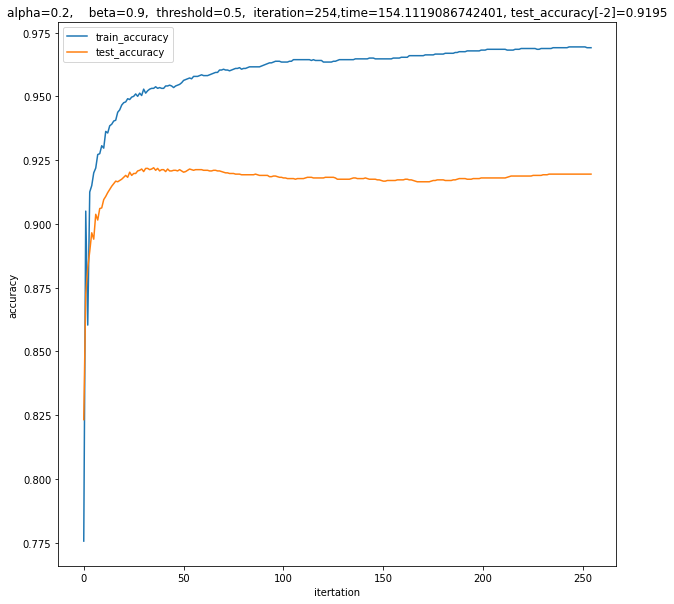

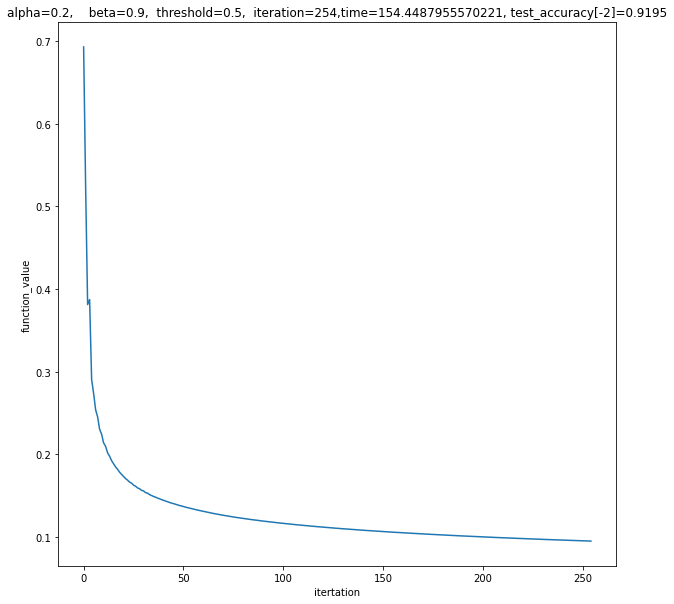

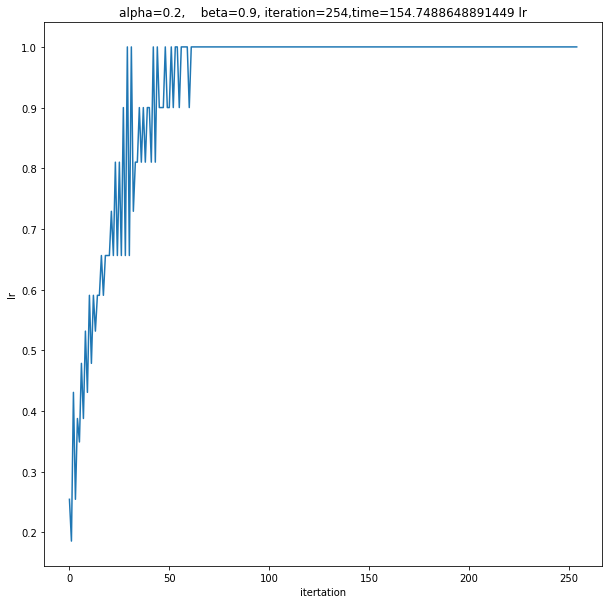

0 0.6931471805599209
lr:  0.2621440000000001
train_accuracy 0.7325
test_accuracy 0.79125
1 0.5345137240514858
lr:  0.1677721600000001
train_accuracy 0.9034375
test_accuracy 0.8585
2 0.3799069513683
train_accuracy 0.4128125
test_accuracy 0.57625
3 1.322777803908117
lr:  0.32768000000000014
train_accuracy 0.90625
test_accuracy 0.89625
4 0.2518223746442868
lr:  0.40960000000000013
train_accuracy 0.91875
test_accuracy 0.8925
5 0.22812840068752524
lr:  0.6400000000000001
train_accuracy 0.9221875
test_accuracy 0.90325
6 0.22174378065178924
lr:  0.40960000000000013
train_accuracy 0.92875
test_accuracy 0.89975
7 0.21007111695549302
train_accuracy 0.9234375
test_accuracy 0.9095
8 0.21569631354355476
lr:  0.40960000000000013
train_accuracy 0.9359375
test_accuracy 0.907
9 0.19577103115900282
train_accuracy 0.9275
test_accuracy 0.91175
10 0.2021373836130957
lr:  0.40960000000000013
train_accuracy 0.9428125
test_accuracy 0.911
11 0.18576184157795758
train_accuracy 0.9390625
test_accuracy 0.9155
12 

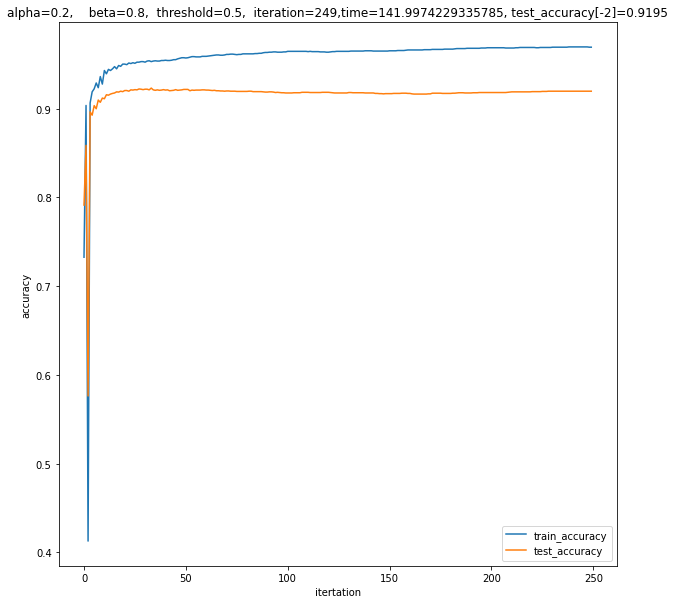

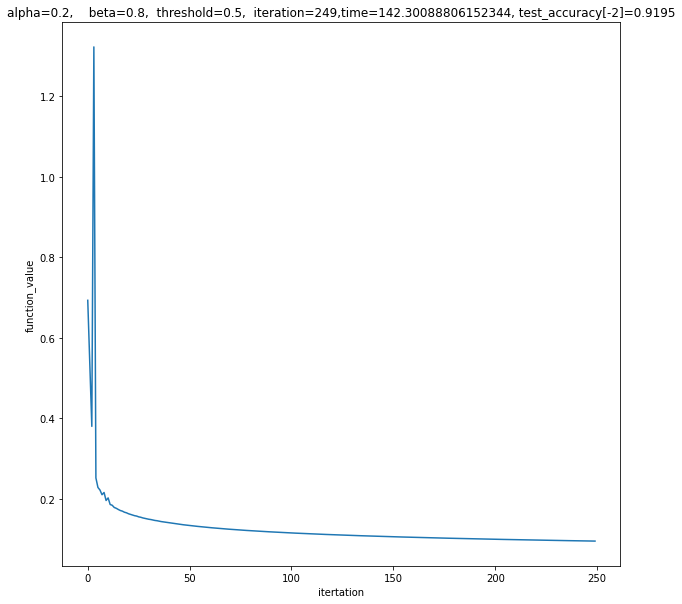

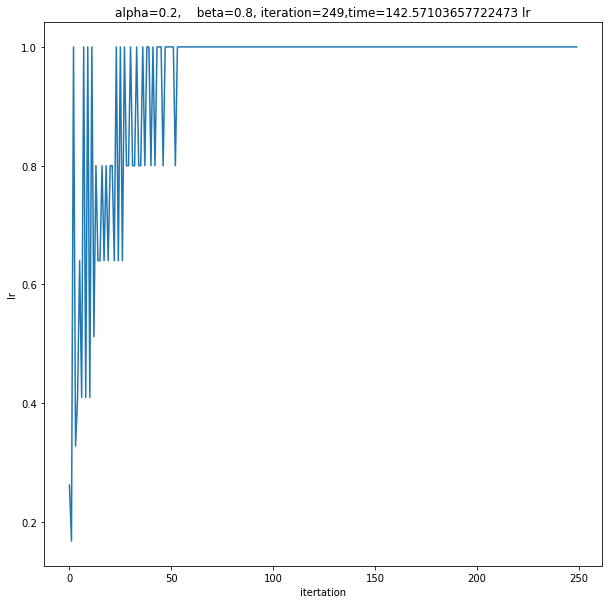

0 0.6931471805599209
lr:  0.24009999999999992
train_accuracy 0.8325
test_accuracy 0.8655
1 0.5088907570519039
lr:  0.16806999999999994
train_accuracy 0.9025
test_accuracy 0.85525
2 0.38848476494915085
train_accuracy 0.415
test_accuracy 0.5805
3 1.2965790086546243
lr:  0.3429999999999999
train_accuracy 0.9015625
test_accuracy 0.89775
4 0.2613757407917506
lr:  0.3429999999999999
train_accuracy 0.919375
test_accuracy 0.88825
5 0.22778772604010175
train_accuracy 0.9203125
test_accuracy 0.907
6 0.22173831592098503
lr:  0.3429999999999999
train_accuracy 0.930625
test_accuracy 0.8995
7 0.20648617628988689
train_accuracy 0.9346875
test_accuracy 0.90825
8 0.19786631273966662
lr:  0.48999999999999994
train_accuracy 0.9365625
test_accuracy 0.90775
9 0.1930515791177703
train_accuracy 0.9325
test_accuracy 0.914
10 0.19279565055190134
lr:  0.48999999999999994
train_accuracy 0.94125
test_accuracy 0.9135
11 0.1841372136494655
lr:  0.7
train_accuracy 0.940625
test_accuracy 0.9145
12 0.1813703407091927


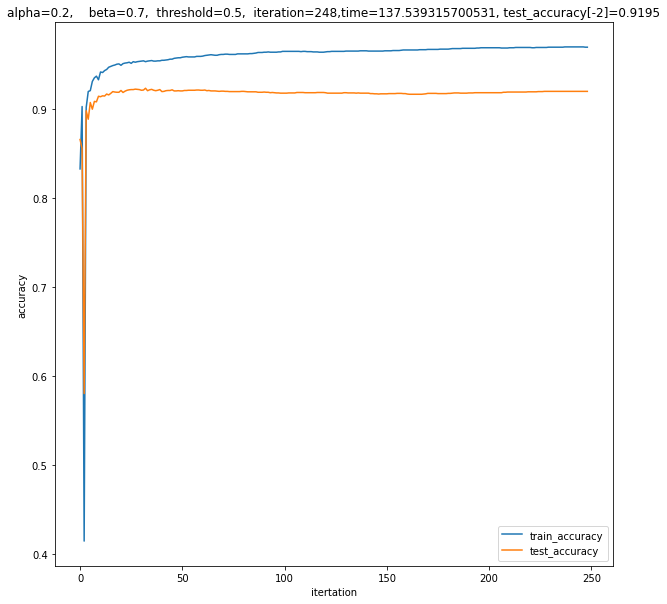

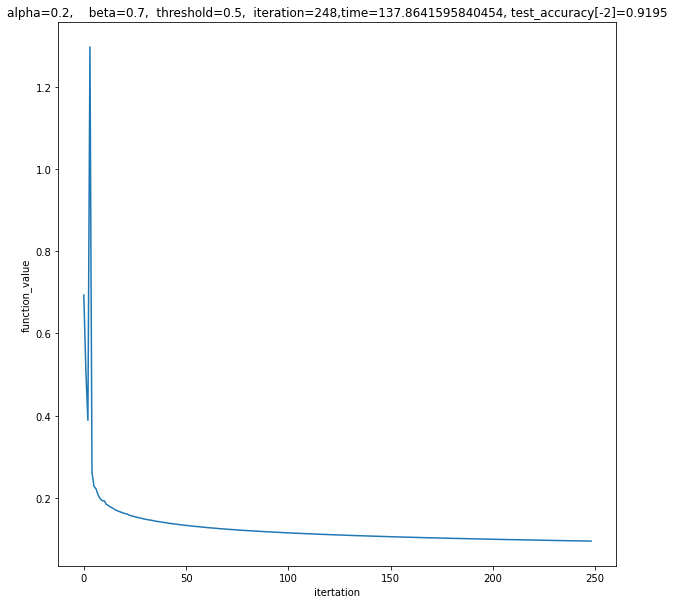

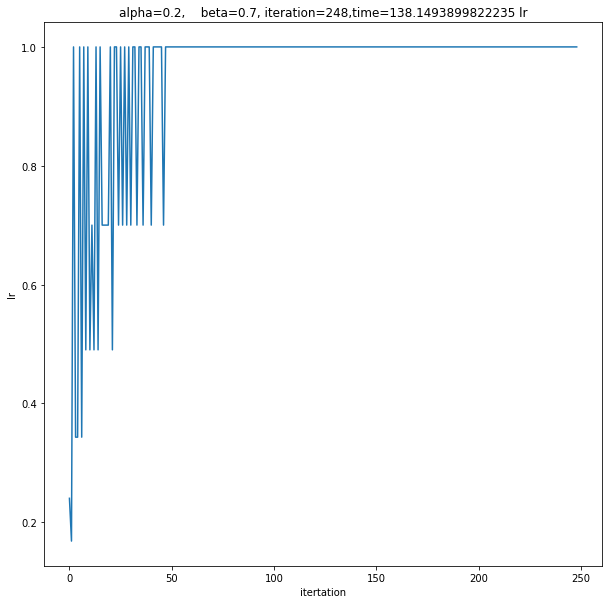

0 0.6931471805599209
lr:  0.216
train_accuracy 0.88875
test_accuracy 0.8875
1 0.493785092186463
lr:  0.216
train_accuracy 0.9040625
test_accuracy 0.882
2 0.39404444290139146
lr:  0.216
train_accuracy 0.9090625
test_accuracy 0.87125
3 0.341399294993976
lr:  0.6
train_accuracy 0.8465625
test_accuracy 0.87475
4 0.38411955116448
lr:  0.216
train_accuracy 0.919375
test_accuracy 0.882
5 0.2661417860843578
train_accuracy 0.9103125
test_accuracy 0.90525
6 0.2581443621354331
lr:  0.36
train_accuracy 0.926875
test_accuracy 0.902
7 0.22779756664984863
lr:  0.36
train_accuracy 0.930625
test_accuracy 0.9
8 0.21908399115735175
train_accuracy 0.924375
test_accuracy 0.90825
9 0.21934408645626996
lr:  0.36
train_accuracy 0.93625
test_accuracy 0.90675
10 0.20171032888704768
train_accuracy 0.93125
test_accuracy 0.9115
11 0.20213638438684517
lr:  0.36
train_accuracy 0.9428125
test_accuracy 0.909
12 0.19018360788876673
train_accuracy 0.940625
test_accuracy 0.91525
13 0.1849157558078217
lr:  0.6
train_accur

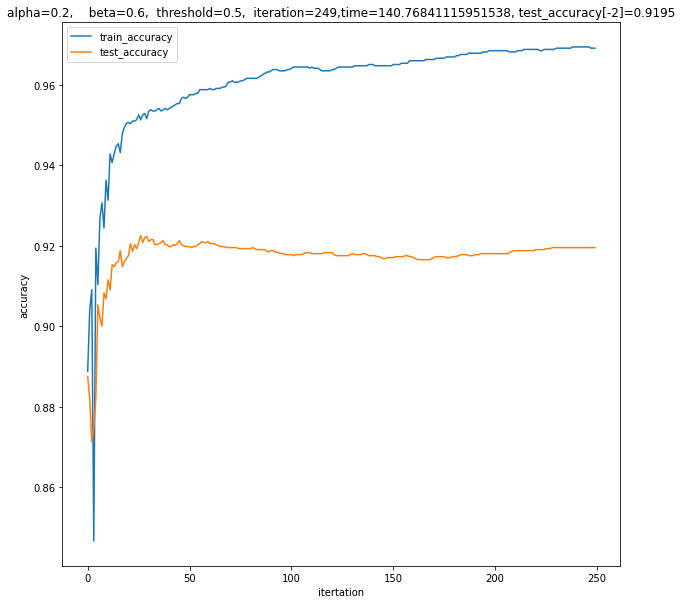

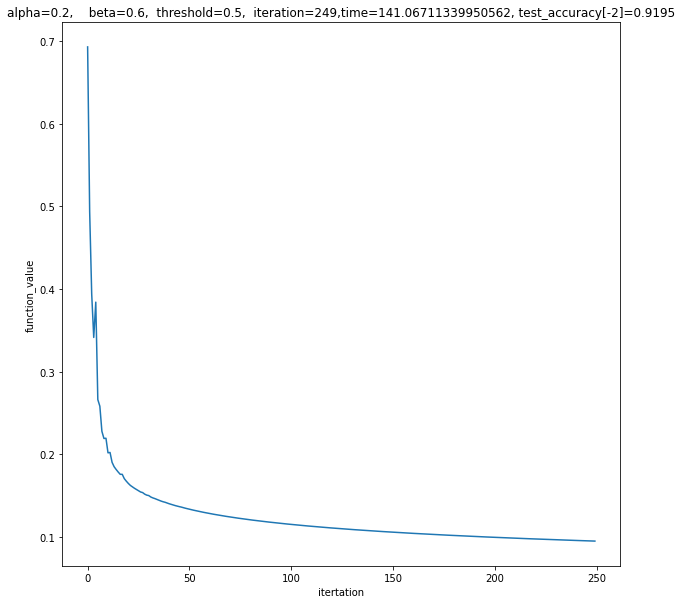

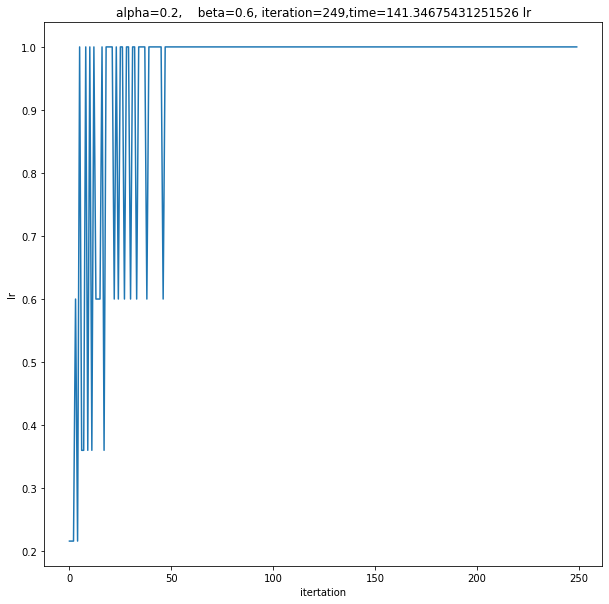

0 0.6931471805599209
lr:  0.25
train_accuracy 0.7940625
test_accuracy 0.838
1 0.5189647789324983
lr:  0.125
train_accuracy 0.894375
test_accuracy 0.82925
2 0.3963271592593333
train_accuracy 0.91625
test_accuracy 0.87625
3 0.26693517652398385
train_accuracy 0.911875
test_accuracy 0.859
4 0.24892164387062196
lr:  0.25
train_accuracy 0.926875
test_accuracy 0.89275
5 0.22821397098246965
train_accuracy 0.9328125
test_accuracy 0.8975
6 0.21187347615943153
train_accuracy 0.930625
test_accuracy 0.8825
7 0.20946747501780139
lr:  0.25
train_accuracy 0.9371875
test_accuracy 0.90475
8 0.198054255495524
train_accuracy 0.9415625
test_accuracy 0.90725
9 0.19021912307485053
train_accuracy 0.9428125
test_accuracy 0.90675
10 0.18467357178727437
lr:  0.5
train_accuracy 0.945
test_accuracy 0.911
11 0.18144822788058446
train_accuracy 0.944375
test_accuracy 0.90475
12 0.17882939927382438
lr:  0.5
train_accuracy 0.9471875
test_accuracy 0.91125
13 0.174823835249489
train_accuracy 0.9453125
test_accuracy 0.907

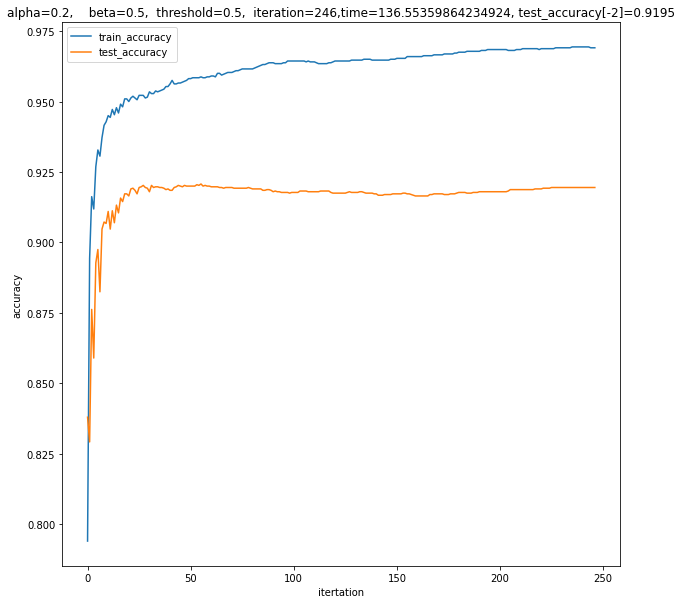

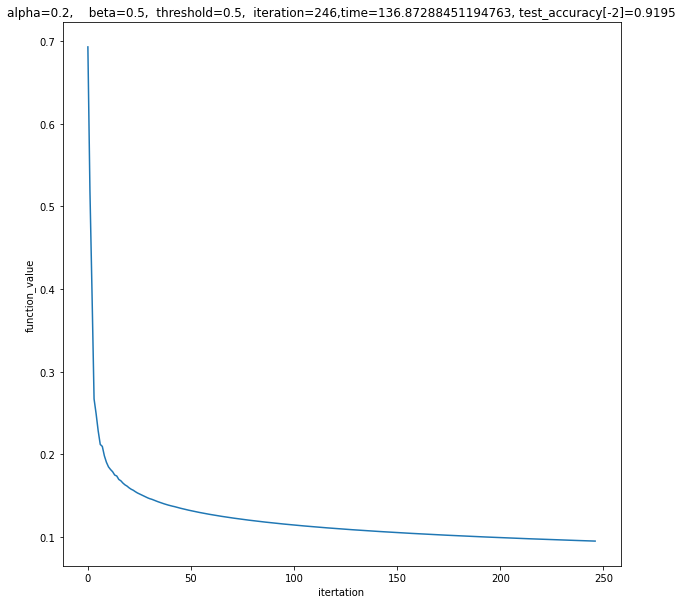

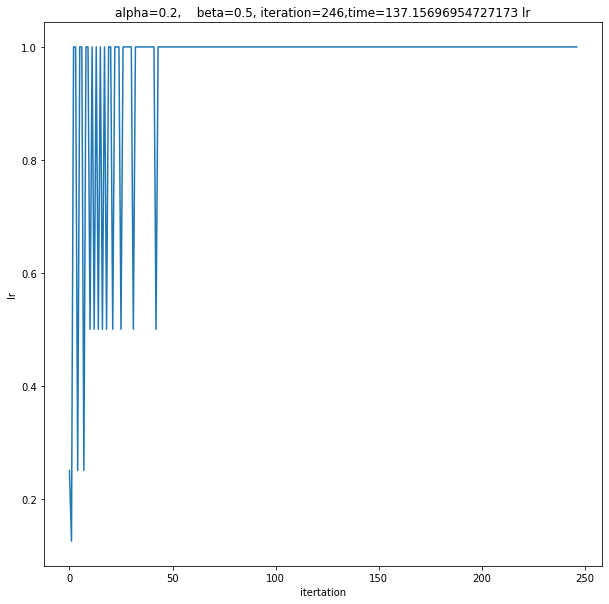

In [ ]:


threshold=0.5

lr=1
iteration=3000



# alpha=0.5
# beta=0.9

alpha_list=[0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2]
beta_list=[0.9, 0.8, 0.7, 0.6, 0.5,  0.9, 0.8, 0.7, 0.6, 0.5, 0.9, 0.8, 0.7, 0.6, 0.5, 0.9, 0.8, 0.7, 0.6, 0.5,]


train_accuracy=[]
test_accuracy=[]
function_value=[]
lr_list=[] 


for alpha, beta in zip(alpha_list,beta_list):
  pp=0
  weight=np.zeros(x_train.shape[1])
  bias=np.zeros(1,)
  start=time.time()
  train_accuracy=[]
  test_accuracy=[]
  function_value=[]
  lr_list=[]
  for _ in range(iteration):


    tmp_grad_weight, tmp_grad_bias=0,0 

    for data,label in zip(x_train,y_train):
    
      grad_weight, grad_bias = prime_function(data,label,weight,bias)
      tmp_grad_weight += grad_weight
      tmp_grad_bias += grad_bias

    x_length=len(x_train)

    grad_weight = (tmp_grad_weight / x_length)
    grad_bias = (tmp_grad_bias / x_length)


    lr=1 


    weight_tmp = weight - lr*grad_weight 
    bias_tmp = bias - lr*grad_bias

    
    sum_tmp=0 
    for data,label in zip(x_train,y_train):
        sum_tmp += function(data,label,weight_tmp,bias_tmp)

    sum_tmp=sum_tmp/x_train.shape[0]
    
    sum=0
    for data,label in zip(x_train,y_train):
      sum += function(data,label,weight,bias)

    sum=sum/x_train.shape[0]
    print(_,sum) 


    t=0


    while sum_tmp > (sum - alpha*lr*(np.sum(grad_weight**2) + grad_bias**2)): 
      lr=lr*beta 

      weight_tmp = weight - lr*grad_weight  
      bias_tmp = bias - lr*grad_bias
      t+=1

      sum_tmp=0
      for data,label in zip(x_train,y_train):
        sum_tmp += function(data,label,weight_tmp,bias_tmp)

      sum_tmp=sum_tmp/x_train.shape[0]

      if t>1000:
        break


    if lr!=1:
      print('lr: ',lr)
    

  



    weight, bias=GD2(x_train,y_train,weight_tmp,bias_tmp,lr=lr)

    

    lr_list.append(lr)
    a= accuracy(prediction(x_train,weight,bias,threshold=threshold),y_train)
    b= accuracy(prediction(x_test,weight,bias,threshold=threshold),y_test)
    train_accuracy.append(a) 
    test_accuracy.append(b)
    print('train_accuracy', a)
    print('test_accuracy',b)
    function_value.append(sum)

    try:
      if test_accuracy[-2]==b:
        pp+=1

        if pp>20:
          break
      else:
        pp=0
    except:
      pass
    

  plt.figure(figsize=(10,10))
  o=len(train_accuracy)

  plt.plot(list(range(o)),train_accuracy)

  plt.plot(list(range(o)),test_accuracy)

  plt.legend(['train_accuracy','test_accuracy'])

  plt.title('alpha={},    beta={},  threshold={},  iteration={},time={}, test_accuracy[-2]={}'.format(alpha,beta,threshold, _,time.time()-start, test_accuracy[-2]))
  plt.xlabel('itertation')
  plt.ylabel('accuracy')

  plt.savefig('/content/drive/MyDrive/AI_mathematic/backtracking_line_search_accuracy   alpha={},    beta={},  threshold={},  iteration={},time={},test_accuracy[-2]={}.jpg'.format(alpha,beta,threshold,_,time.time()-start,test_accuracy[-2]))
  plt.show()

  plt.figure(figsize=(10,10))

  plt.plot(list(range(len(function_value))),function_value)
  plt.xlabel('itertation')
  plt.ylabel('function_value')
  plt.title('alpha={},    beta={},  threshold={},  iteration={},time={}, test_accuracy[-2]={}'.format(alpha,beta,threshold,_ ,time.time()-start,test_accuracy[-2]))
  plt.savefig('/content/drive/MyDrive/AI_mathematic/backtracking_line_search_function value   alpha={},    beta={},  threshold={},  iteration={},time={},test_accuracy[-2]={}.jpg'.format(alpha,beta,threshold,_,time.time()-start,test_accuracy[-2]))
  plt.show()

  plt.figure(figsize=(10,10))

  plt.plot(list(range(len(function_value))),lr_list)
  plt.xlabel('itertation')
  plt.ylabel('lr')
  plt.title('alpha={},    beta={}, iteration={},time={} lr'.format(alpha,beta,_,time.time()-start))
  plt.savefig('/content/drive/MyDrive/AI_mathematic/backtracking_line_search_lr   alpha={},    beta={},  threshold={},  iteration={},time={},test_accuracy[-2]={}.jpg'.format(alpha,beta,threshold,_,time.time()-start,test_accuracy[-2]))
  plt.show()








## SGD

In [ ]:
np.random.randint(0,3010)

1328

0.315625
0.50525
random:  515
0.684375
0.49475
random:  1474
0.684375
0.49475
random:  2207
0.684375
0.49475
random:  712
0.684375
0.49475
random:  3112
0.684375
0.49475
random:  1814
0.684375
0.49475
random:  1082
0.684375
0.49475
random:  2029
0.4371875
0.5915
random:  2334
0.4371875
0.5915
random:  1536
0.6846875
0.49475
random:  3016
0.5459375
0.44025
random:  572
0.40875
0.564
random:  1770
0.6990625
0.625
random:  2334
0.6990625
0.625
random:  723
0.6990625
0.625
random:  853
0.6990625
0.625
random:  1351
0.6990625
0.625
random:  2657
0.6990625
0.625
random:  1595
0.6990625
0.625
random:  2798
0.7075
0.5405
random:  3191
0.55625
0.6605
random:  963
0.7515625
0.68925
random:  133
0.7515625
0.68925
random:  1820
0.7509375
0.688
random:  940
0.435625
0.58025
random:  2030
0.68125
0.7345
random:  396
0.7846875
0.6765
random:  2974
0.7846875
0.6765
random:  2831
0.7846875
0.6765
random:  2160
0.7846875
0.6765
random:  2437
0.7846875
0.6765
random:  1410
0.7846875
0.6765
random:  426
0

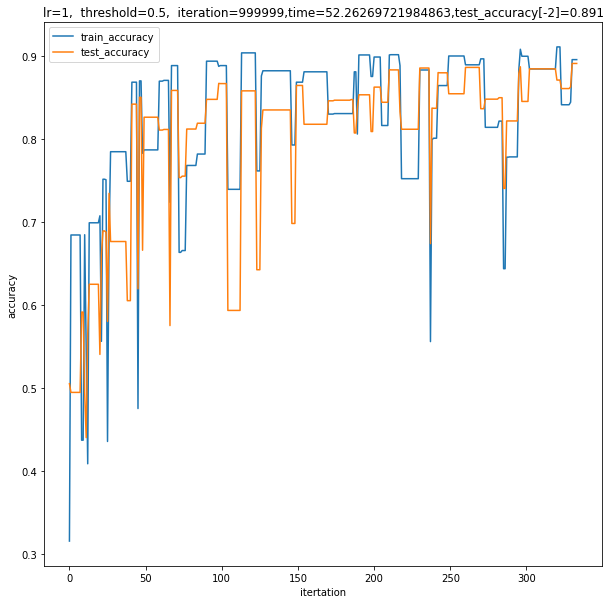

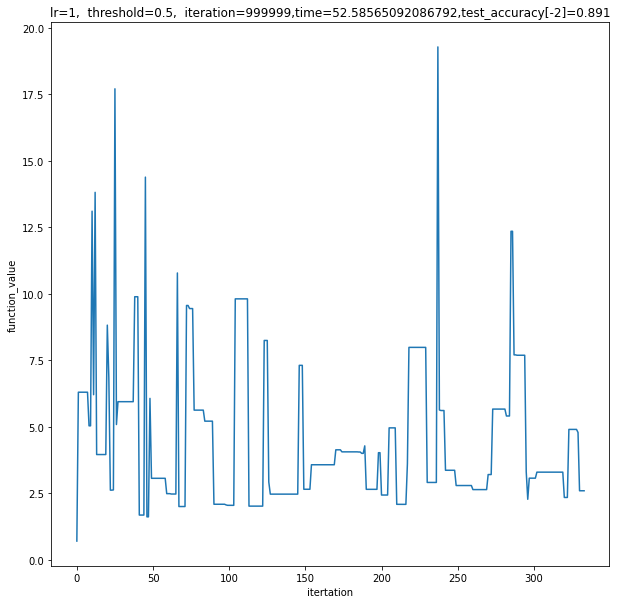

0.315625
0.50525
random:  2433
0.315625
0.50525
random:  1911
0.6315625
0.5965
random:  219
0.6675
0.5775
random:  1426
0.6871875
0.50075
random:  2583
0.336875
0.5185
random:  1681
0.6971875
0.75625
random:  2119
0.688125
0.507
random:  1367
0.688125
0.507
random:  2570
0.7165625
0.77175
random:  2784
0.6875
0.50125
random:  1309
0.6875
0.50125
random:  1740
0.6875
0.50125
random:  1750
0.83875
0.785
random:  2588
0.8384375
0.78475
random:  1221
0.8390625
0.786
random:  2319
0.8390625
0.786
random:  1574
0.8390625
0.786
random:  378
0.83875
0.7855
random:  2997
0.83875
0.7855
random:  632
0.83875
0.7855
random:  275
0.83875
0.7855
random:  1358
0.83875
0.7855
random:  2418
0.5959375
0.70575
random:  2372
0.5959375
0.70575
random:  2155
0.5959375
0.70575
random:  1282
0.616875
0.72575
random:  2485
0.8359375
0.85175
random:  935
0.8478125
0.85575
random:  497
0.8478125
0.85575
random:  2162
0.8478125
0.85575
random:  1509
0.7778125
0.658
random:  614
0.7778125
0.658
random:  2325
0.777

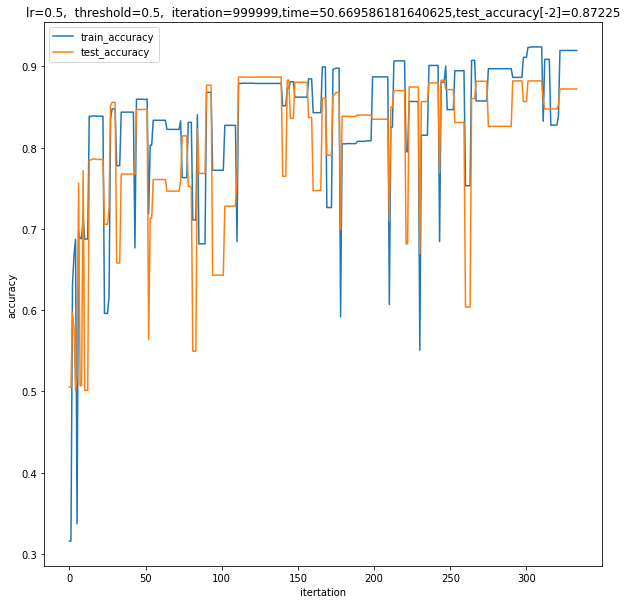

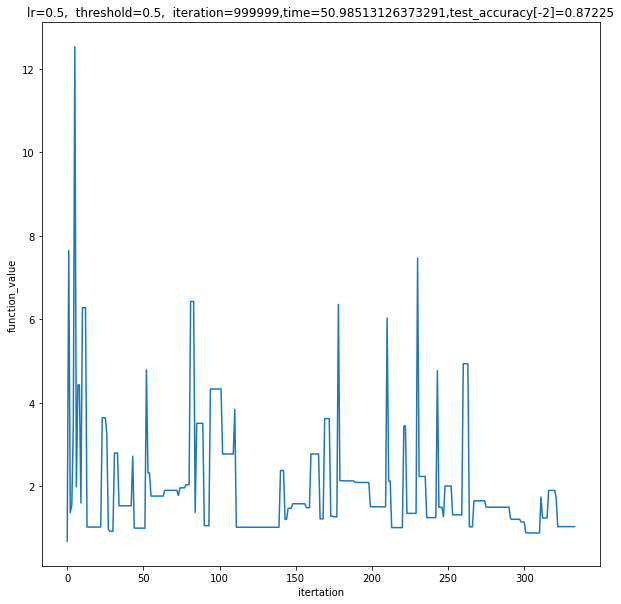

0.315625
0.50525
random:  1901
0.315625
0.50525
random:  2675
0.7003125
0.58025
random:  1843
0.6978125
0.518
random:  479
0.5346875
0.6485
random:  1097
0.6903125
0.53975
random:  1480
0.6196875
0.6975
random:  1840
0.4184375
0.5735
random:  1338
0.418125
0.573
random:  3074
0.763125
0.7575
random:  1619
0.7875
0.71
random:  2823
0.783125
0.677
random:  907
0.7775
0.65925
random:  1705
0.7415625
0.59075
random:  2116
0.831875
0.78225
random:  1742
0.83125
0.777
random:  1859
0.839375
0.76375
random:  1637
0.8403125
0.74175
random:  2962
0.8396875
0.73425
random:  355
0.838125
0.726
random:  2798
0.820625
0.70325
random:  1443
0.8184375
0.699
random:  787
0.7715625
0.63175
random:  1781
0.8496875
0.739
random:  2403
0.849375
0.73825
random:  2477
0.7553125
0.61075
random:  650
0.6034375
0.70575
random:  1194
0.5978125
0.69975
random:  865
0.713125
0.77475
random:  2541
0.8375
0.8235
random:  1973
0.8384375
0.71275
random:  853
0.8375
0.71275
random:  2717
0.811875
0.8225
random:  531
0

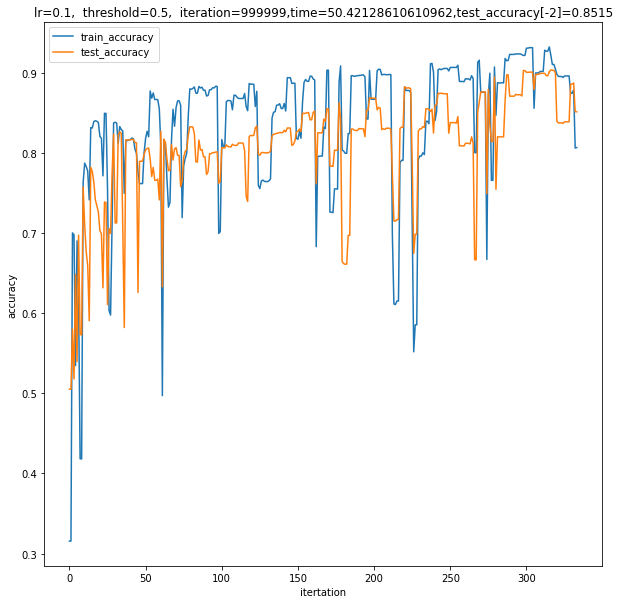

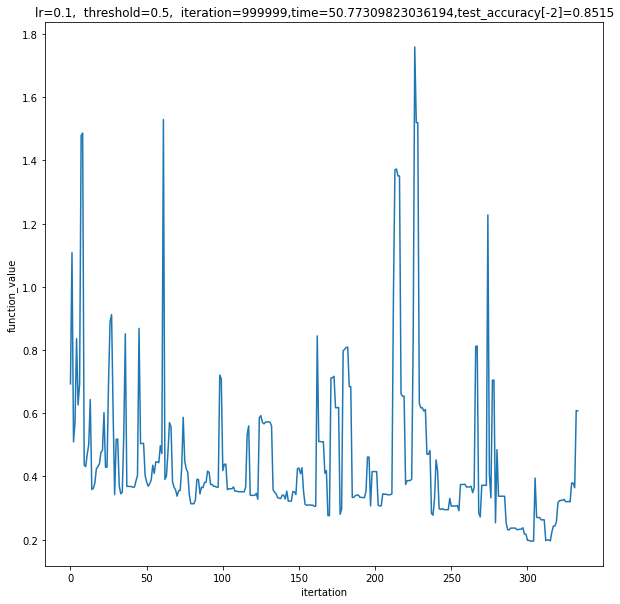

0.315625
0.50525
random:  2792
0.315625
0.50525
random:  1549
0.848125
0.80275
random:  447
0.7178125
0.555
random:  2402
0.6903125
0.50275
random:  1967
0.39875
0.5685
random:  1322
0.33
0.51525
random:  2842
0.3246875
0.5115
random:  3119
0.866875
0.87425
random:  2901
0.8784375
0.86375
random:  3169
0.84625
0.78725
random:  2867
0.779375
0.8285
random:  1401
0.840625
0.857
random:  2372
0.855625
0.8535
random:  2466
0.8540625
0.80325
random:  210
0.8096875
0.84625
random:  2648
0.8440625
0.7835
random:  166
0.7578125
0.6245
random:  1394
0.7490625
0.61225
random:  663
0.7375
0.59475
random:  2395
0.7190625
0.56525
random:  2264
0.7103125
0.5515
random:  36
0.6965625
0.52425
random:  16
0.7975
0.70675
random:  2374
0.7271875
0.57275
random:  2592
0.7040625
0.5355
random:  2578
0.696875
0.5195
random:  180
0.694375
0.51425
random:  784
0.87
0.841
random:  1315
0.4215625
0.5865
random:  530
0.6678125
0.756
random:  2814
0.836875
0.7615
random:  3122
0.834375
0.7525
random:  786
0.85875

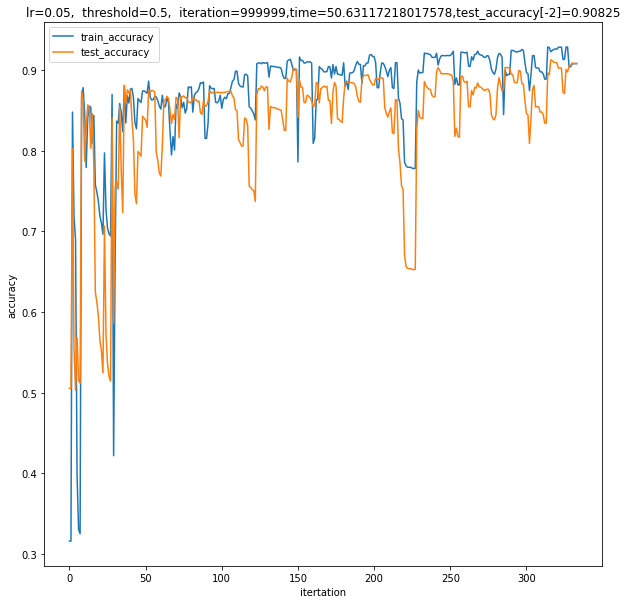

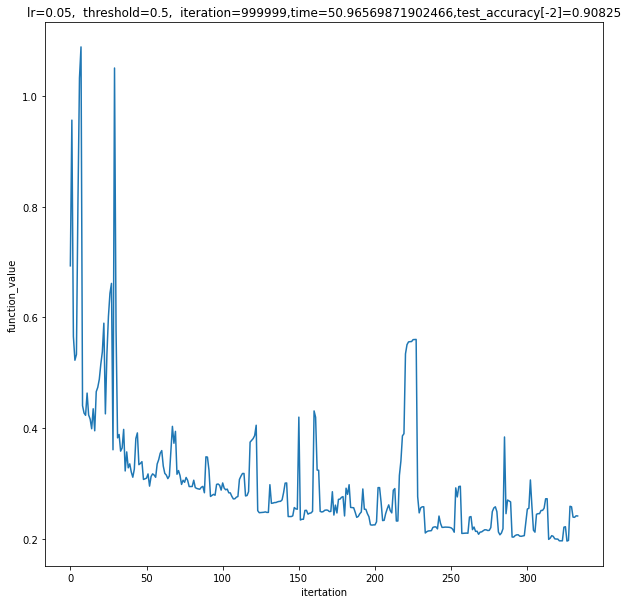

0.315625
0.50525
random:  1871
0.684375
0.49475
random:  3107
0.475625
0.615
random:  2929
0.729375
0.57475
random:  973
0.6846875
0.49475
random:  738
0.684375
0.49475
random:  1040
0.684375
0.49475
random:  878
0.684375
0.49475
random:  967
0.684375
0.49475
random:  737
0.684375
0.49475
random:  1831
0.684375
0.49475
random:  1436
0.684375
0.49475
random:  2972
0.684375
0.495
random:  3086
0.7140625
0.53775
random:  2595
0.79875
0.679
random:  1958
0.7428125
0.579
random:  2062
0.7190625
0.5465
random:  2519
0.819375
0.70925
random:  886
0.7753125
0.635
random:  2563
0.81625
0.81425
random:  857
0.8603125
0.7645
random:  1773
0.8221875
0.687
random:  2839
0.7921875
0.64975
random:  1468
0.86625
0.791
random:  2031
0.835
0.72025
random:  2417
0.7603125
0.615
random:  1374
0.701875
0.525
random:  1040
0.693125
0.5085
random:  992
0.6871875
0.50025
random:  2357
0.6853125
0.49625
random:  1408
0.7790625
0.631
random:  767
0.7546875
0.59675
random:  537
0.733125
0.56925
random:  1119
0.8

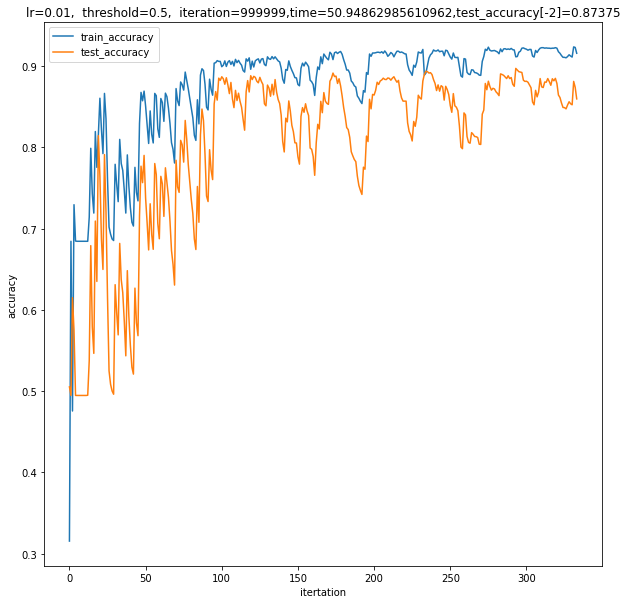

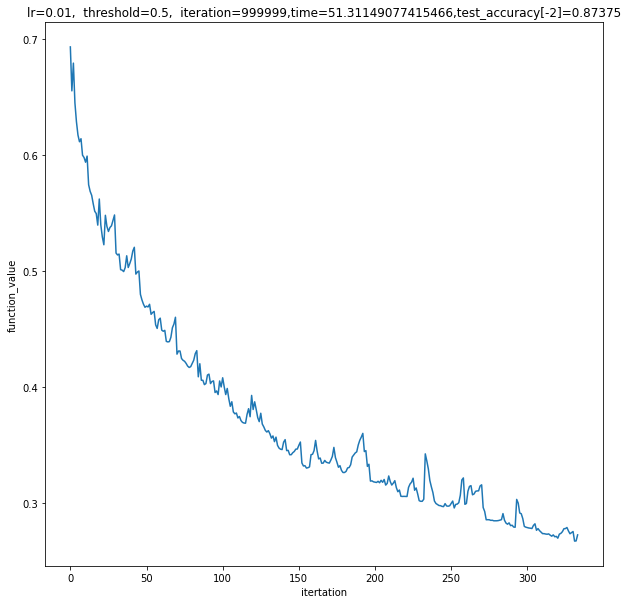

0.315625
0.50525
random:  1120
0.684375
0.49475
random:  1307
0.684375
0.49475
random:  583
0.684375
0.49475
random:  2922
0.684375
0.49475
random:  2271
0.684375
0.49475
random:  3120
0.684375
0.49475
random:  2763
0.684375
0.49475
random:  2386
0.6865625
0.4975
random:  944
0.6846875
0.495
random:  1121
0.684375
0.49475
random:  1745
0.68625
0.49875
random:  800
0.768125
0.631
random:  1750
0.834375
0.749
random:  2640
0.7865625
0.6655
random:  673
0.84875
0.7975
random:  2449
0.8165625
0.70075
random:  2324
0.7371875
0.585
random:  2346
0.70875
0.5435
random:  36
0.685625
0.49675
random:  865
0.684375
0.49525
random:  1141
0.684375
0.495
random:  1655
0.684375
0.49475
random:  253
0.684375
0.49475
random:  1909
0.684375
0.49475
random:  477
0.684375
0.49475
random:  1676
0.684375
0.49475
random:  2563
0.688125
0.50175
random:  343
0.6846875
0.49525
random:  205
0.684375
0.49475
random:  131
0.684375
0.49475
random:  2187
0.684375
0.49475
random:  2595
0.685625
0.495
random:  2808
0.

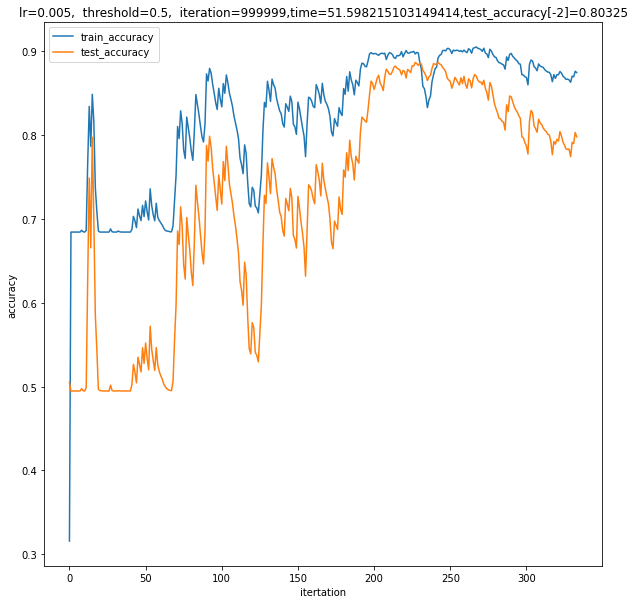

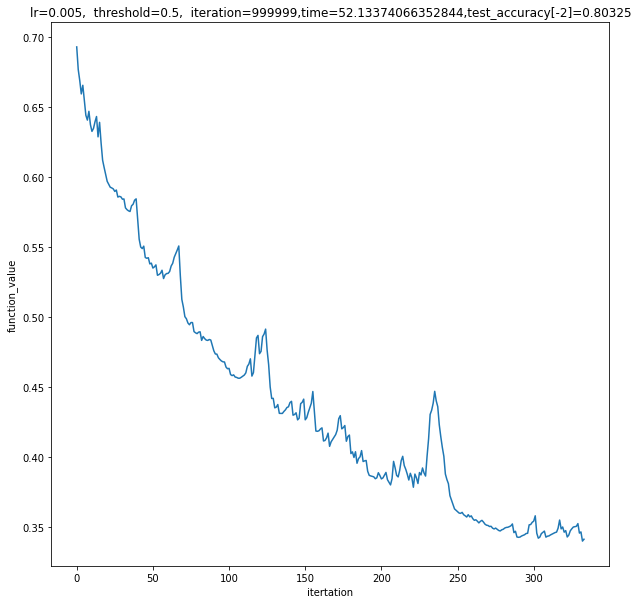

0.315625
0.50525
random:  3041
0.684375
0.49475
random:  1598
0.684375
0.49475
random:  1838
0.4834375
0.62125
random:  1950
0.7153125
0.59425
random:  2786
0.685
0.4955
random:  1860
0.684375
0.49475
random:  3020
0.684375
0.49475
random:  2278
0.684375
0.49475
random:  1658
0.684375
0.49475
random:  2750
0.729375
0.5835
random:  779
0.685625
0.496
random:  1498
0.684375
0.49475
random:  1190
0.724375
0.571
random:  446
0.685
0.497
random:  41
0.684375
0.49475
random:  2985
0.684375
0.49475
random:  144
0.684375
0.49475
random:  2344
0.684375
0.49475
random:  1231
0.684375
0.49475
random:  928
0.684375
0.49475
random:  639
0.684375
0.49475
random:  250
0.684375
0.49475
random:  1251
0.684375
0.49475
random:  773
0.684375
0.49475
random:  716
0.684375
0.49475
random:  1472
0.684375
0.49475
random:  2748
0.684375
0.49475
random:  2290
0.684375
0.49475
random:  1033
0.684375
0.49475
random:  2097
0.684375
0.49475
random:  358
0.684375
0.49475
random:  3079
0.684375
0.49475
random:  2128


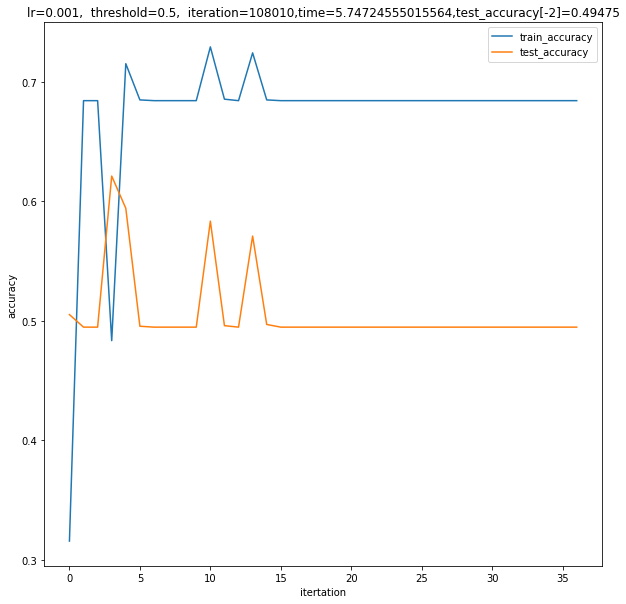

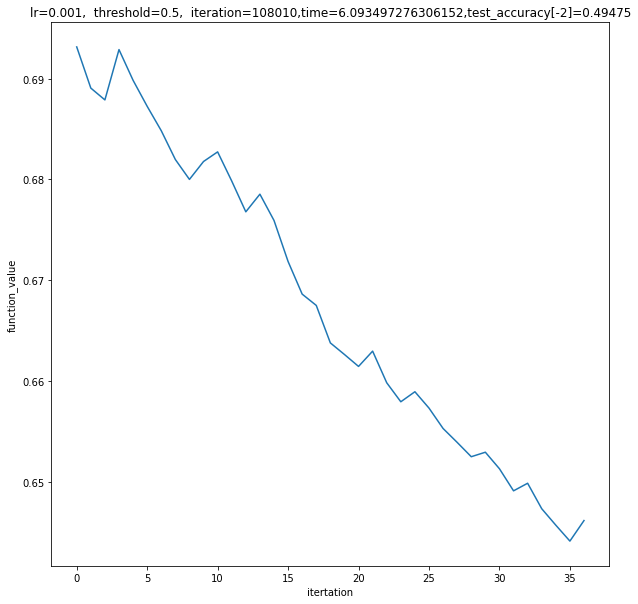

In [ ]:


iteration=1000000
weight=np.zeros(x_train.shape[1])
bias=np.zeros(1,)


thresholds_list=[0.5,0.3,0.4,0.6,0.7]
lr_list=[1,0.5,0.1,0.05,0.01,0.005,0.001]

train_accuracy=[]
test_accuracy=[]
function_value=[]


threshold=0.5

for lr in lr_list:
  start=time.time()

  weight=np.zeros(x_train.shape[1]) 
  bias=np.zeros(1,)
  train_accuracy=[]
  test_accuracy=[]
  function_value=[]
  pp=0


  for _ in range(iteration):


    if _%3000==10:
      sum=0
      for data,label in zip(x_train,y_train): 
        sum += function(data,label,weight,bias)

      sum=sum/x_train.shape[0]

      a= accuracy(prediction(x_train,weight,bias,threshold=threshold),y_train)
      b= accuracy(prediction(x_test,weight,bias,threshold=threshold),y_test)
      train_accuracy.append(a) 
      test_accuracy.append(b)
      print(a)
      print(b)
      function_value.append(sum)

      try:
        if test_accuracy[-2]==b:
          pp+=1

          if pp>20:
            break
        else:
          pp=0
      except:
        pass


      weight,bias = SGD(x_train,y_train,lr=lr,weight=weight,bias=bias)  

    
  plt.figure(figsize=(10,10))
  o=len(train_accuracy)

  plt.plot(list(range(o)),train_accuracy)

  plt.plot(list(range(o)),test_accuracy)

  plt.legend(['train_accuracy','test_accuracy'])
  plt.title('lr={},  threshold={},  iteration={},time={},test_accuracy[-2]={}'.format(lr,threshold,_,time.time()-start,test_accuracy[-2]))
  plt.xlabel('itertation')
  plt.ylabel('accuracy')
  plt.savefig('/content/drive/MyDrive/AI_mathematic/SGD_accuarcy    lr={},  threshold={},  iteration={},time={} ,test_accuracy[-2]={}.jpg'.format(lr,threshold,_,time.time()-start,test_accuracy[-2]))
  plt.show()

  plt.figure(figsize=(10,10))

  plt.plot(list(range(len(function_value))),function_value)
  plt.xlabel('itertation')
  plt.ylabel('function_value')
  plt.title('lr={},  threshold={},  iteration={},time={},test_accuracy[-2]={}'.format(lr,threshold,_,time.time()-start,test_accuracy[-2]))
  plt.savefig('/content/drive/MyDrive/AI_mathematic/SGD_function value   lr={},  threshold={},  iteration={},time={} ,test_accuracy[-2]={}.jpg'.format(lr,threshold,_,time.time()-start,test_accuracy[-2]))
  plt.show()

## MSGD


function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}setInterval(ClickConnect, 1800000)

In [ ]:
n=np.random.randint(0,3010,size=(32,))

In [ ]:
batch_size=32
weight=np.ones(x_train.shape[1])
bias=np.ones(batch_size,)
data=x_train[n]
label=y_train[n]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
random:  [3106 1789 1299  287 2381 1826 1463  803 1964  313]
random:  [3105 1664 2939  811  173 2728 2118 1195  523 2277]
random:  [1322 2242  997 1343  285 2530 2545 1803 1741 2232]
random:  [2264  935 1599   36 1044 2927  807 1411 1400 1442]
random:  [1528 2098  168 2644 1619  221  670  793 1209 3148]
random:  [ 425  618 1709 2687 1171  288 2717 2402 1767 2205]
random:  [2690 1528 2926  296 2114 2259 1769  963 2748 3176]
random:  [2611 2364 2511 2947  430  441 1971 2610 1196 1562]
random:  [  95 2580 1957  106 1033 2567  697 1424  803 2382]
random:  [3146 2497 2212  766 1220  796 2662  951 1844 2025]
random:  [1279  116 2283 1550 1880  647 1528 1552 2257 2590]
random:  [2954 2768  489  950 2442 1666 3030 3160 2835 1951]
random:  [2259 2885  767 3056  168 3147 2069 1444 1835  662]
random:  [2561  308   55 1407 2622 1997  539 2456  687 1199]
random:  [3087  548 2095 1938 2785 1564 3116 2600 1412  739]
random:  [ 545 2429 1966 1955 1733 2825  480 1570

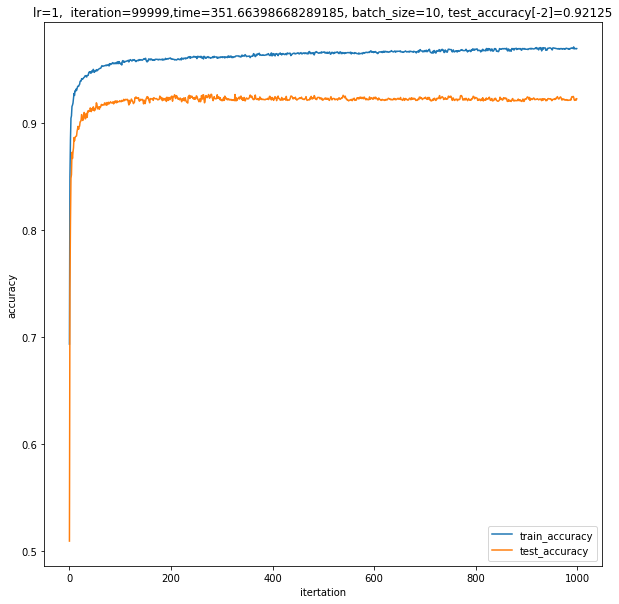

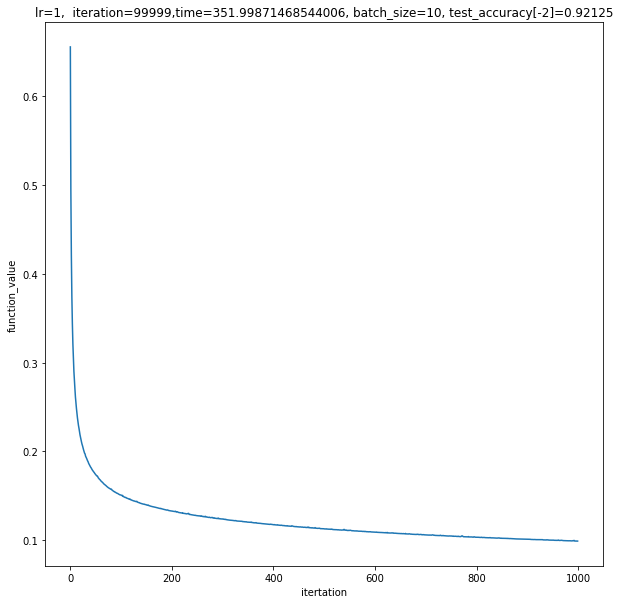

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
random:  [ 378 1576 1831 3110 1614 2951 2132 1124 3175 2761]
random:  [1946  221 2715   97  866 2862 2578  624   57 1013]
random:  [1116  289 1873 2564 1310 1345 2131  455 1837  482]
random:  [1586  395 2153 1136 2538 2179 2475 1200 1123 1802]
random:  [ 535  601 1442 1505 1040 3021 1027 1604  721 2663]
random:  [3017  198 2437 1941  868 1910 2549 2526  116  397]
random:  [1089 1624 2899 2109  892 1986  501 2079  159 2945]
random:  [1966 1100 1979  767 2679   44 2723  822 2755 2884]
random:  [1124 3194 1270 1313 1569 1287 1313 2099 3022  202]
random:  [ 791 2102 1916  900 2532 1990 2535  886 1526 2678]
random:  [2531 2604 2618 2410 2407 1296  409  831 2575 2521]
random:  [1227  157 1441 1460 2668   67 3148  496 1563  866]
random:  [2503  433  501 1256 3175  349 2038 3156   59 1564]
random:  [ 665  960 2133  721 2410 2893 3011  749  700 2786]
random:  [1494 1286 2155  390  715 2316 1820  684  877 1373]
random:  [ 221 2041 1641  223 2393 2204  893 1376

In [ ]:


iteration=100000
weight=np.zeros(x_train.shape[1])
bias=np.zeros(1,)

thresholds_list=[0.5,0.3,0.4,0.6,0.7]
lr_list=[1,0.5,0.1,0.05,0.01,0.005,0.001]

batch_size_list=[10,20,30,40,50,60,70,80,90,100]


batch_size=30
threshold=0.5
# for threshold in thresholds_list:
for batch_size in batch_size_list:
  for lr in lr_list:

    start=time.time()

    weight=np.zeros(x_train.shape[1]) 
    bias=np.zeros(1,)
    train_accuracy=[]
    test_accuracy=[]
    function_value=[]
    pp=0

    for _ in range(iteration):

      if _%100 ==10:
        sum=0
        for data,label in zip(x_train,y_train): 
          sum += function(data,label,weight,bias)

        sum=sum/x_train.shape[0]
        print(_,sum) 
      
        a= accuracy(prediction(x_train,weight,bias,threshold=threshold),y_train)
        b= accuracy(prediction(x_test,weight,bias,threshold=threshold),y_test)
        train_accuracy.append(a) 
        test_accuracy.append(b)
        print(a)
        print(b)
        function_value.append(sum)
        try:
          if test_accuracy[-2]==b:
            pp+=1

            if pp>20:
              break
          else:
            pp=0
        except:
          pass

      weight,bias = MSGD(x_train,y_train,lr=lr,weight=weight,bias=bias,batch_size=batch_size) 

      
    plt.figure(figsize=(10,10))
    o=len(train_accuracy)

    plt.plot(list(range(o)),train_accuracy)

    plt.plot(list(range(o)),test_accuracy)

    plt.legend(['train_accuracy','test_accuracy'])
    plt.title('lr={},  iteration={},time={}, batch_size={}, test_accuracy[-2]={}'.format(lr,_,time.time()-start,batch_size,test_accuracy[-2]))
    plt.xlabel('itertation')
    plt.ylabel('accuracy')
    plt.savefig('/content/drive/MyDrive/AI_mathematic/MSGD_accuarcy    lr={},  threshold={},  iteration={},time={},   batch_size={} ,test_accuracy[-2]={}.jpg'.format(lr,threshold,_,time.time()-start,batch_size,test_accuracy[-2]))
    plt.show()

    plt.figure(figsize=(10,10))
    
    plt.plot(list(range(len(function_value))),function_value)
    plt.xlabel('itertation')
    plt.ylabel('function_value')
    plt.title('lr={},  iteration={},time={}, batch_size={}, test_accuracy[-2]={}'.format(lr,_,time.time()-start,batch_size,test_accuracy[-2]))
    plt.savefig('/content/drive/MyDrive/AI_mathematic/MSGD_function value   lr={},  threshold={},  iteration={},time={},  batch_size={}, ,test_accuracy[-2]={}.jpg'.format(lr,threshold,_,time.time()-start,batch_size,test_accuracy[-2]))
    plt.show()

In [ ]:
np.dot(label,data).shape

# 4. 모델 구성

필요한것

1. 초기 가중치
2. 편향
3. 데이터 feature
4. 데이터 label
5. 데이터 feature에 의한 predict
